## Pellet and Meal Analysis and Distribution

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import meals as ml
import tools as tl
from preprocessing import get_all_sheet_names, read_excel_by_sheet, find_dispense_time_by_day
from accuracy import graph_group_stats
from path import *

export_root = '../export/Figure 4'
os.makedirs(os.path.join(export_root, "WT_meal"), exist_ok=True)
time_threshold = 60
pellet_threshold = 2

### female Group

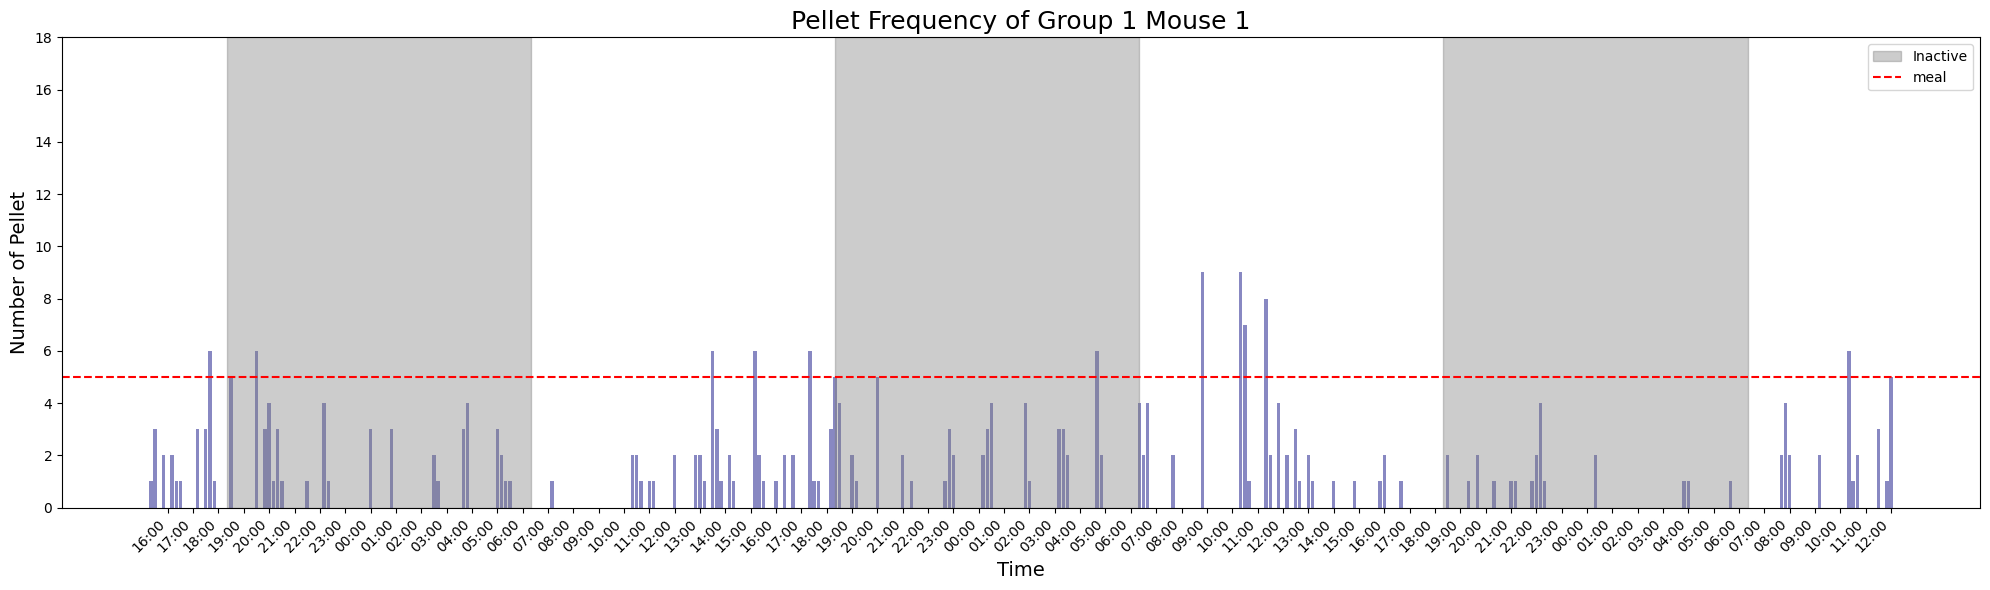

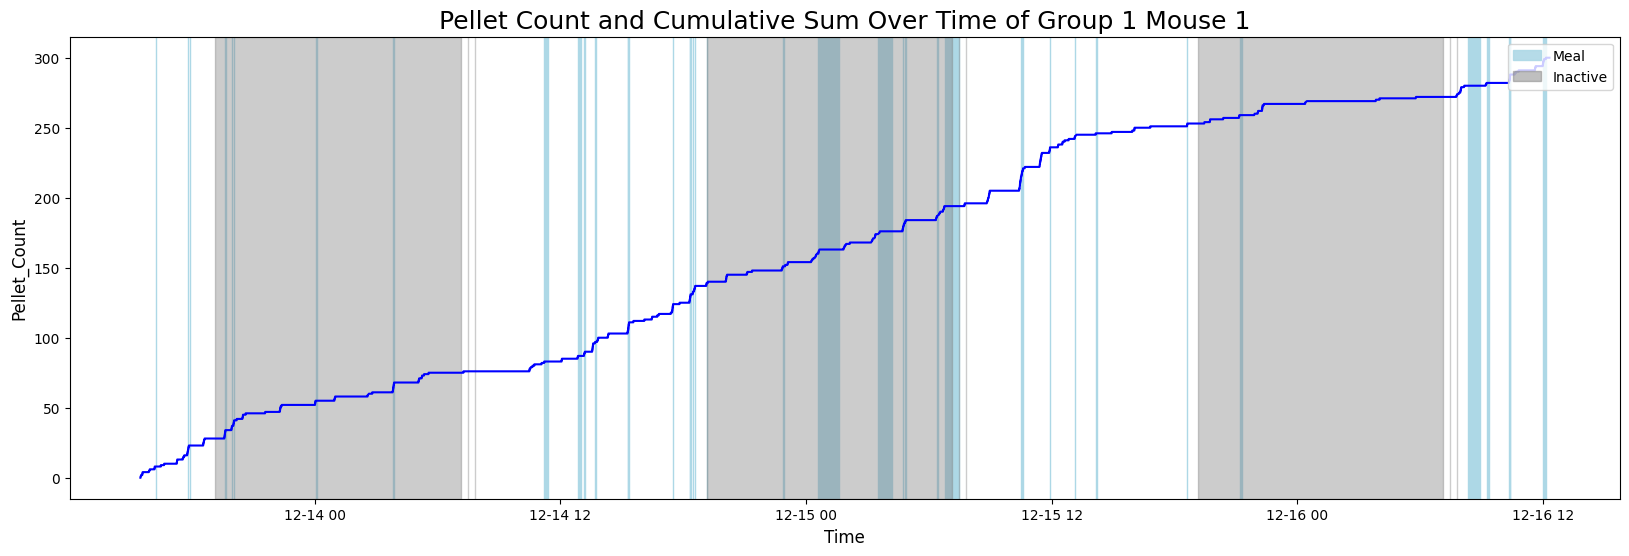

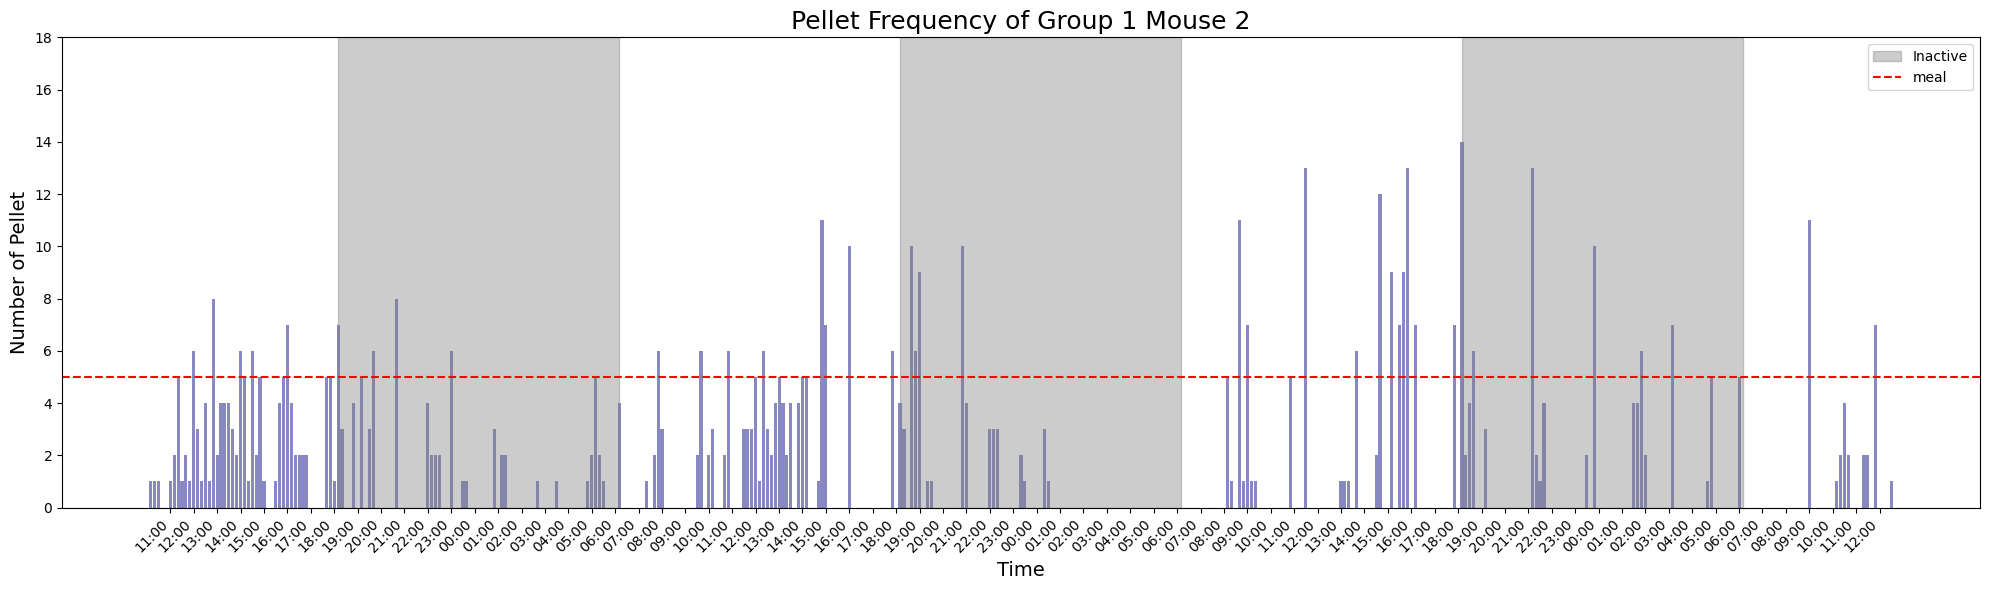

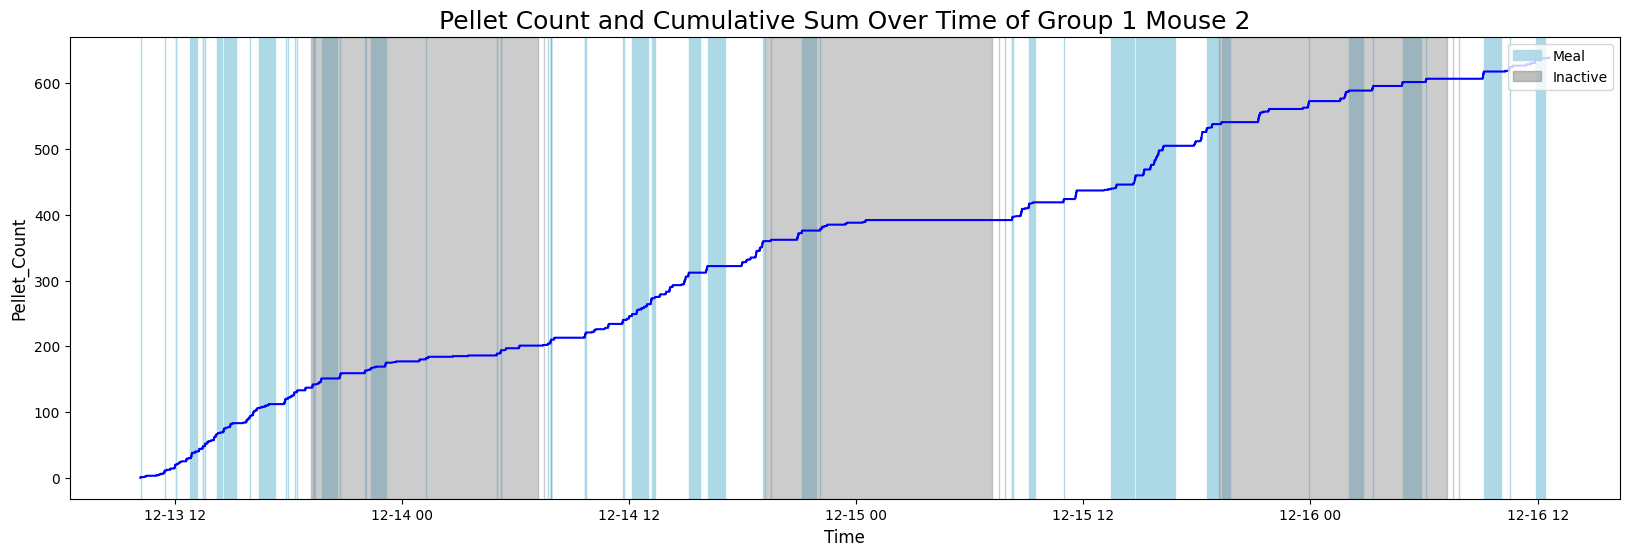

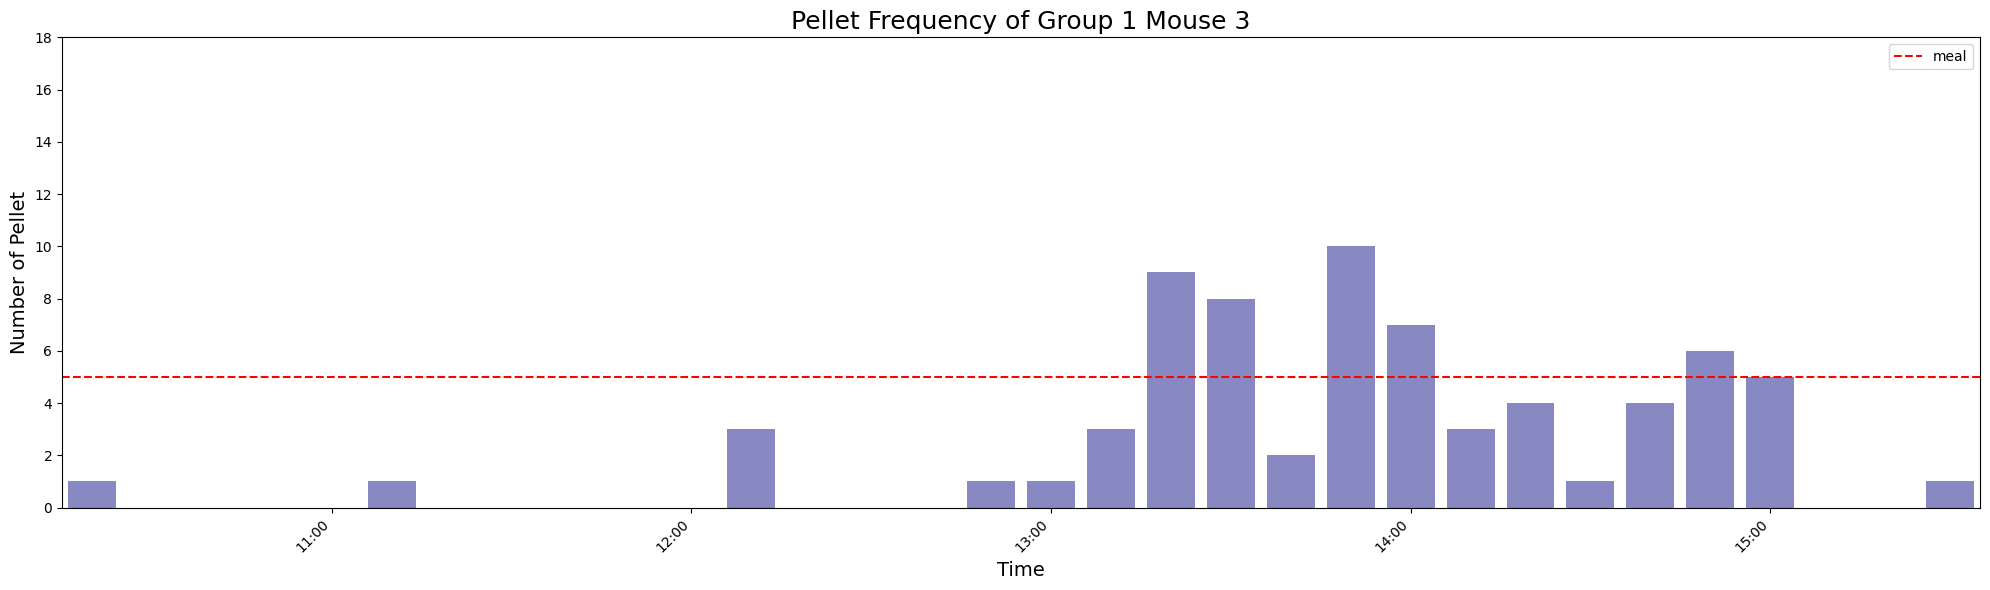

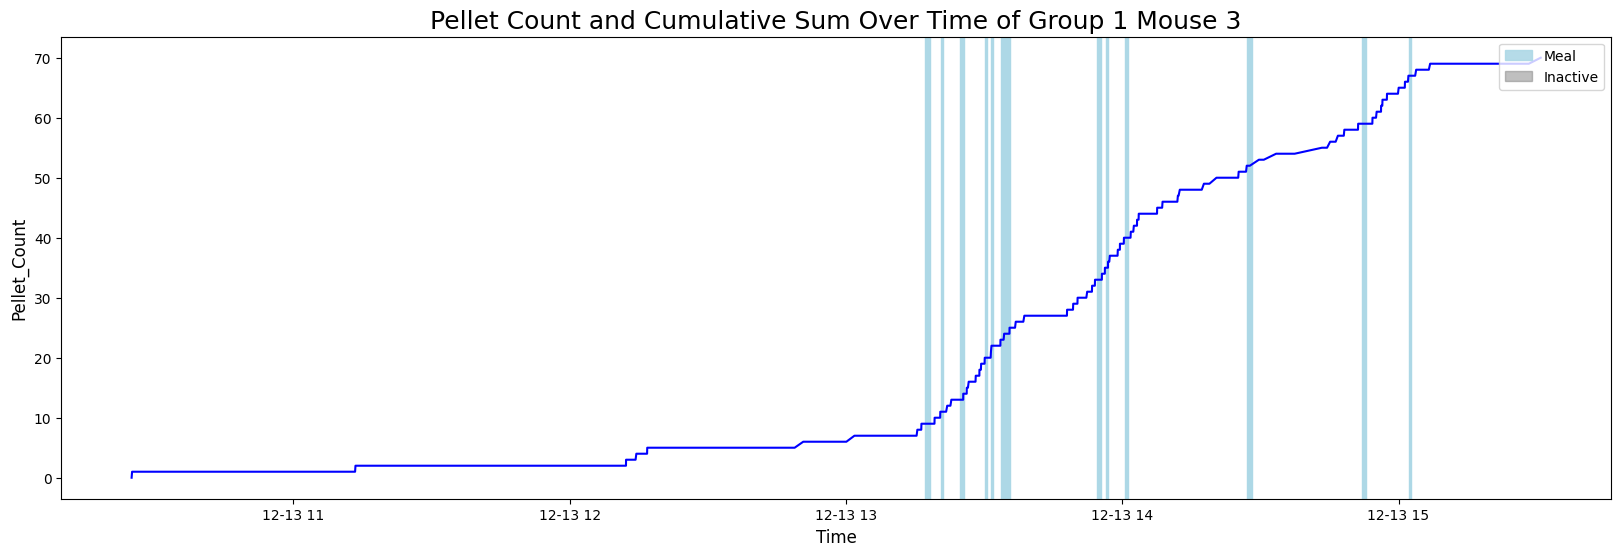

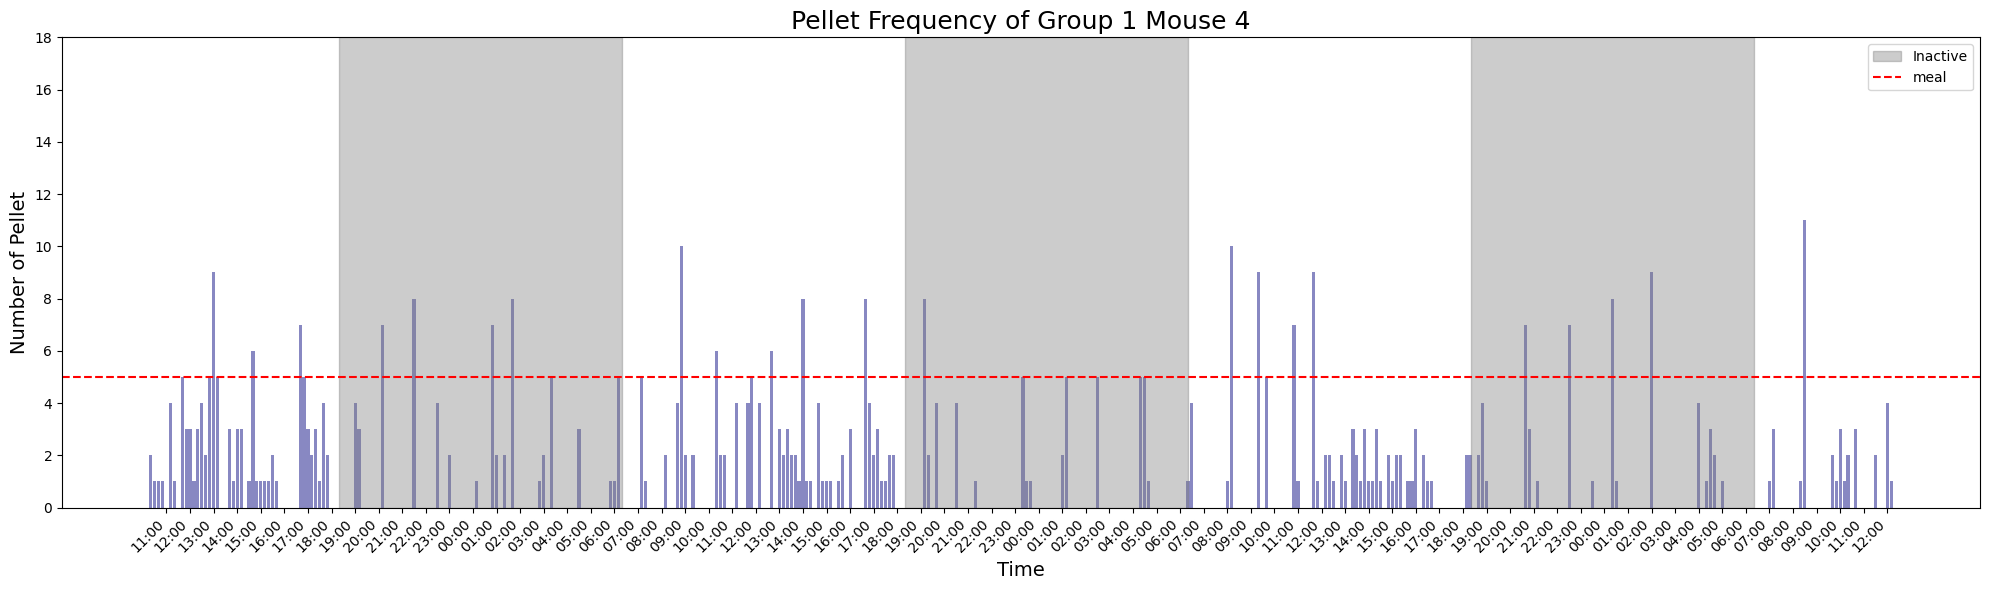

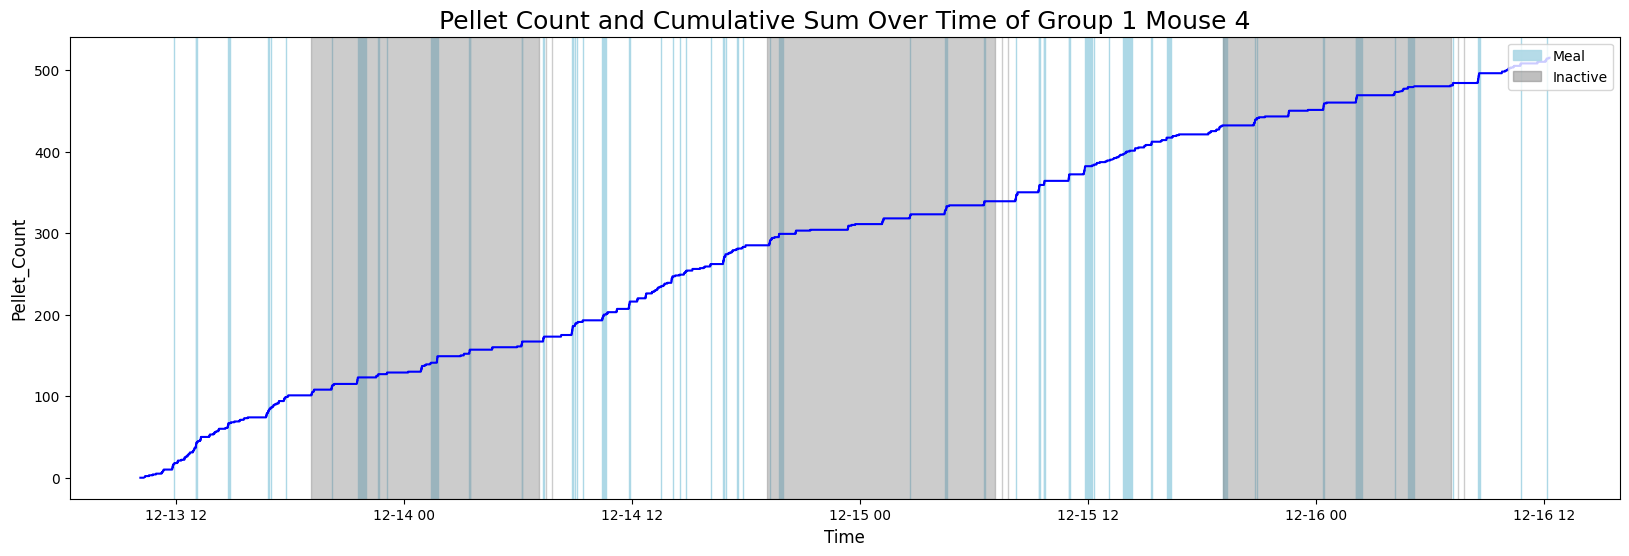

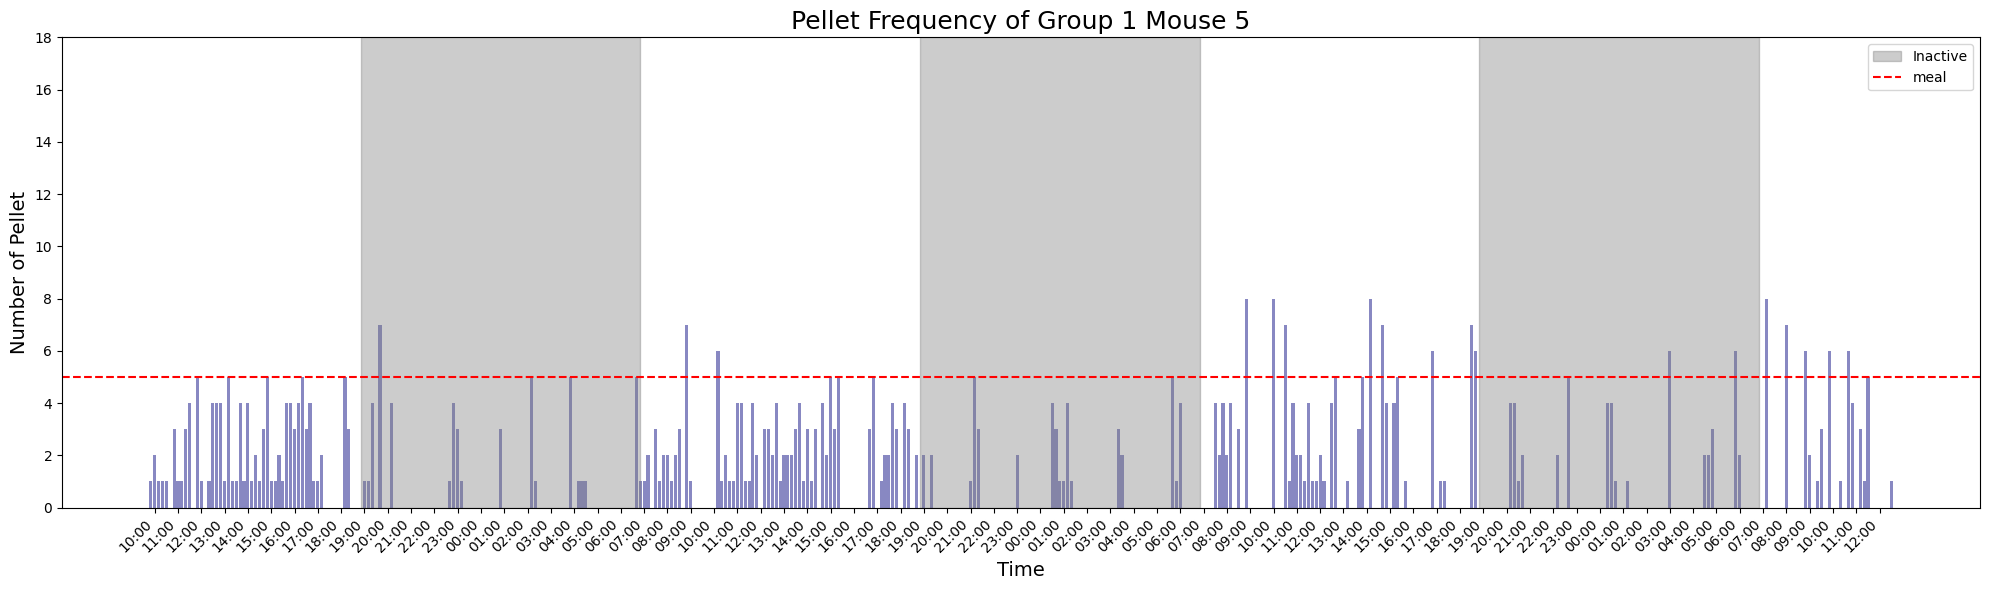

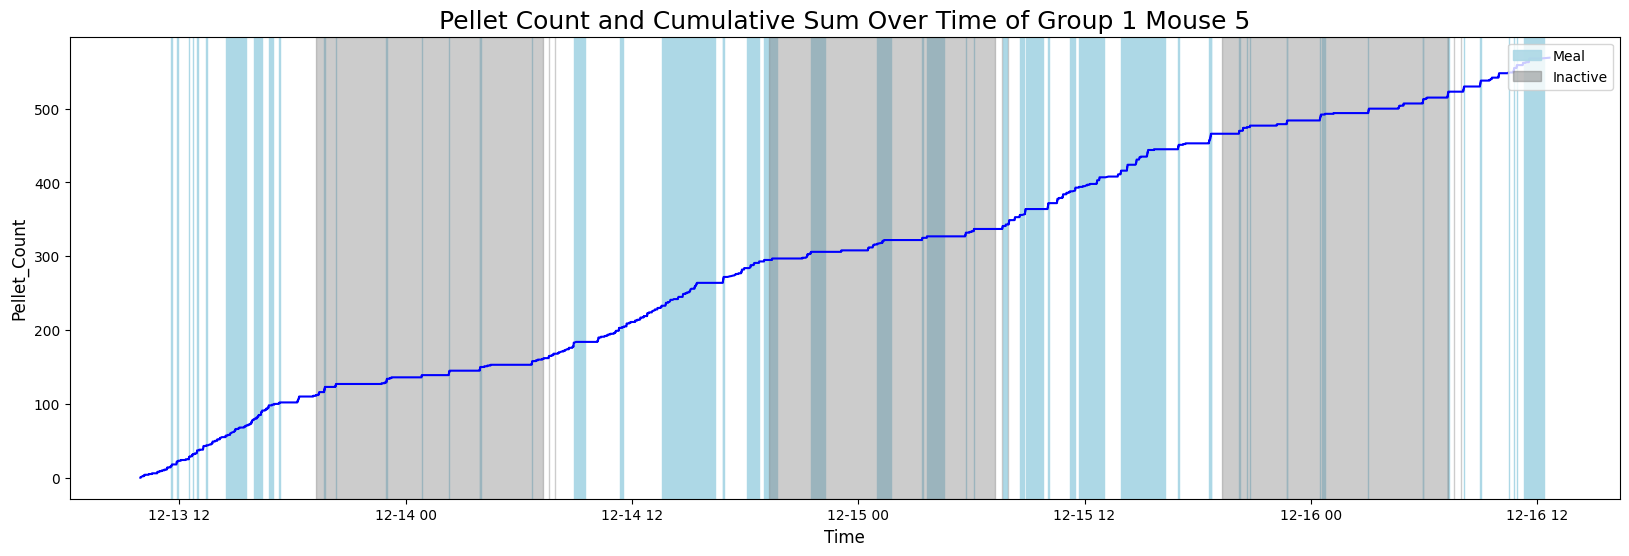

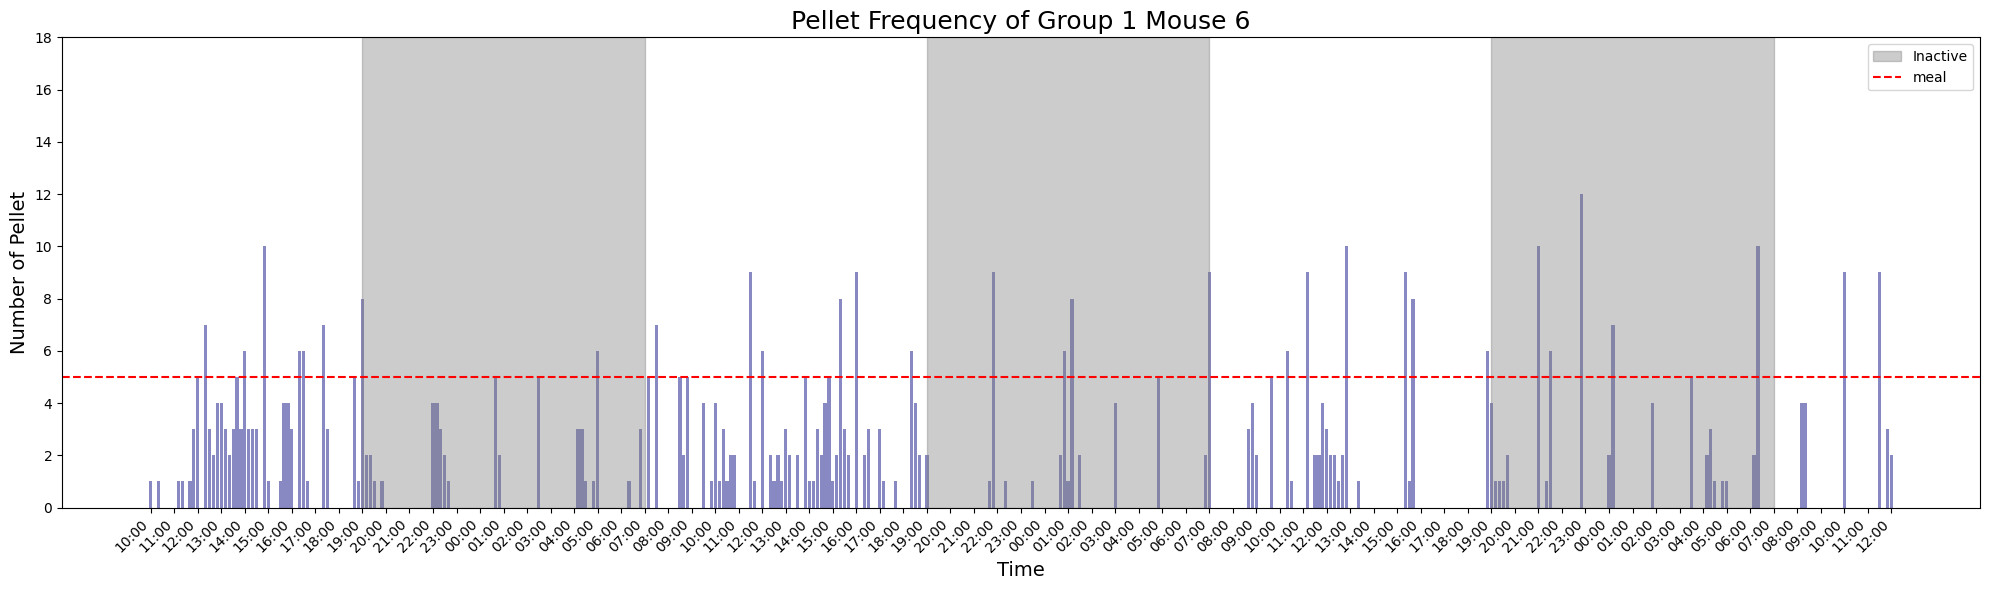

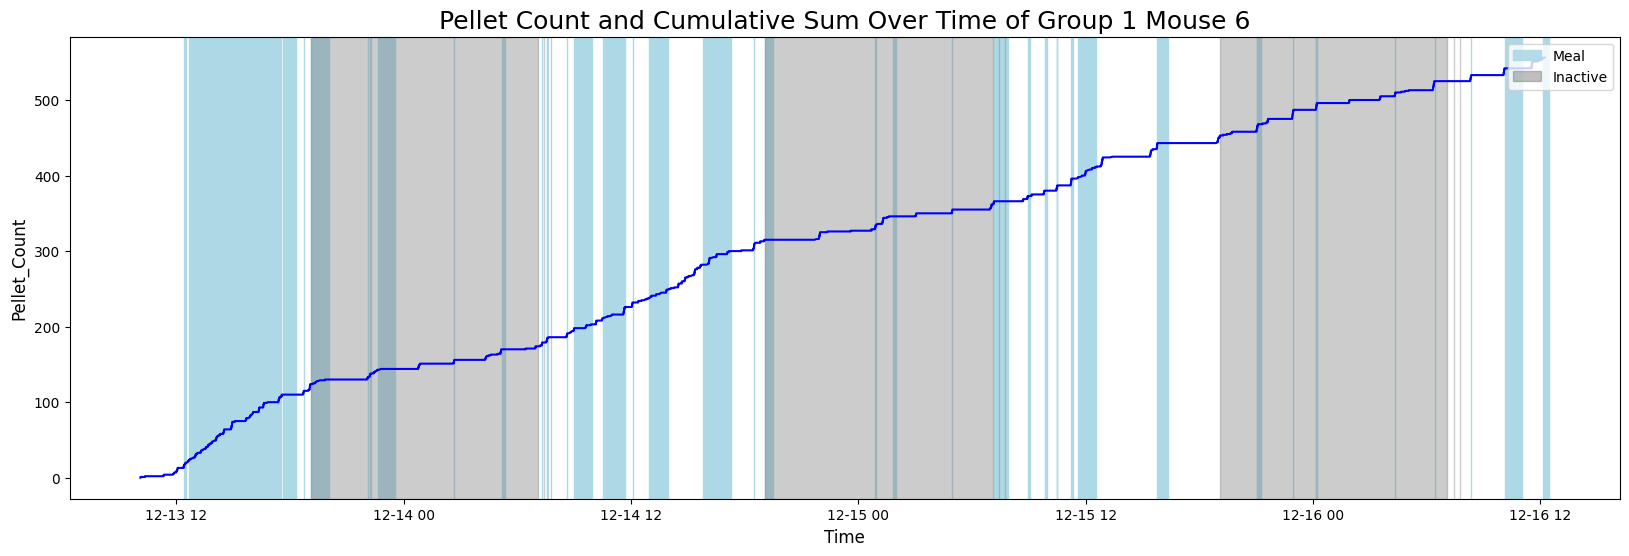

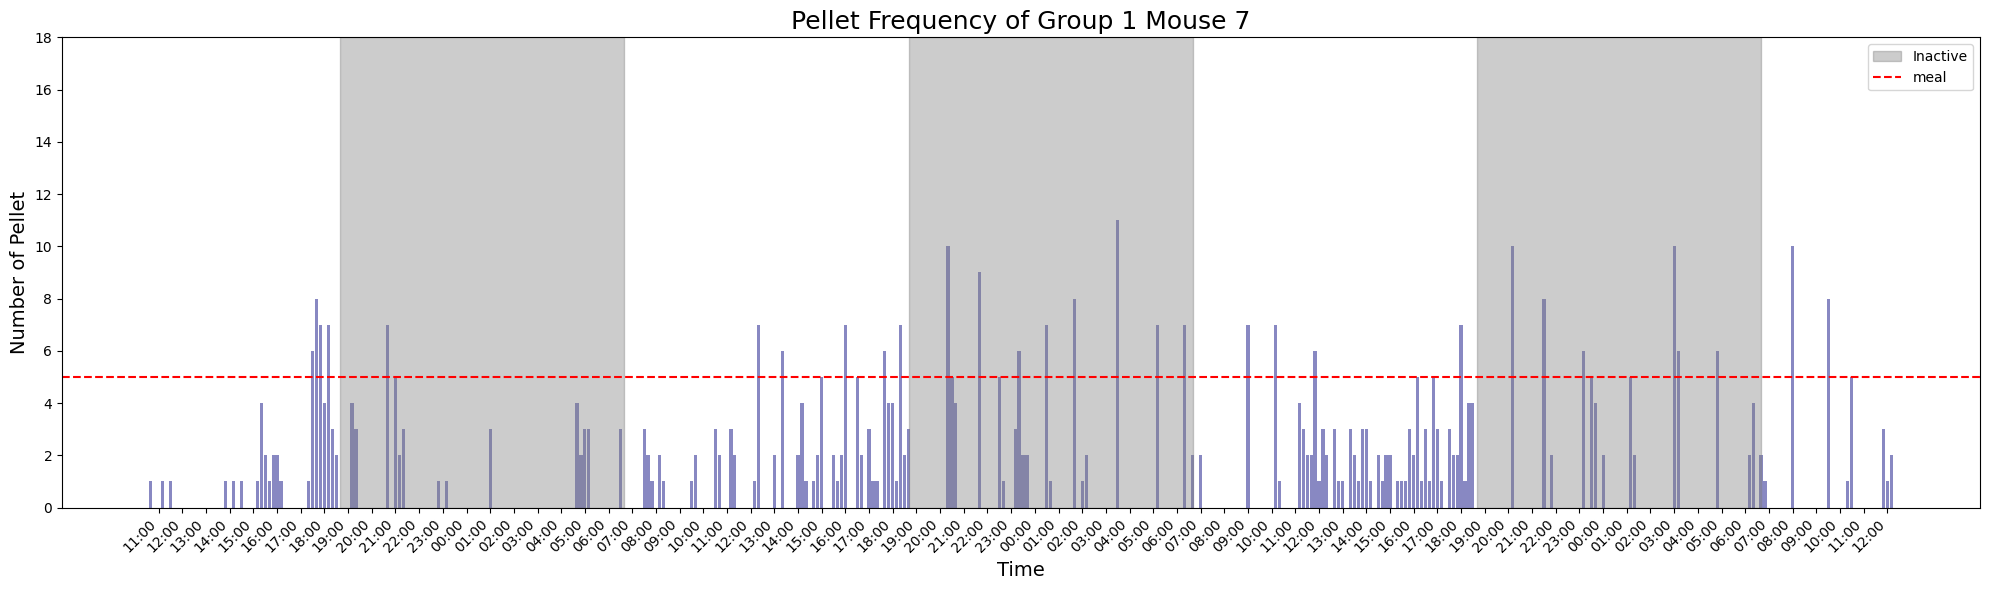

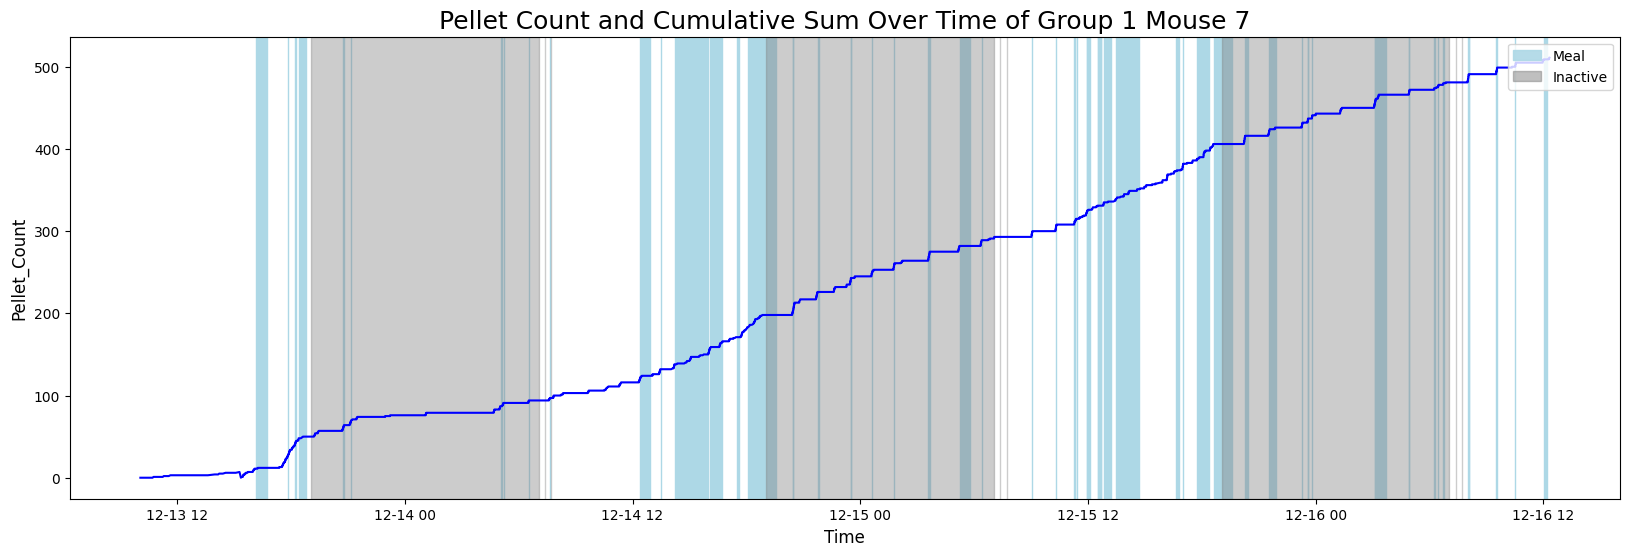

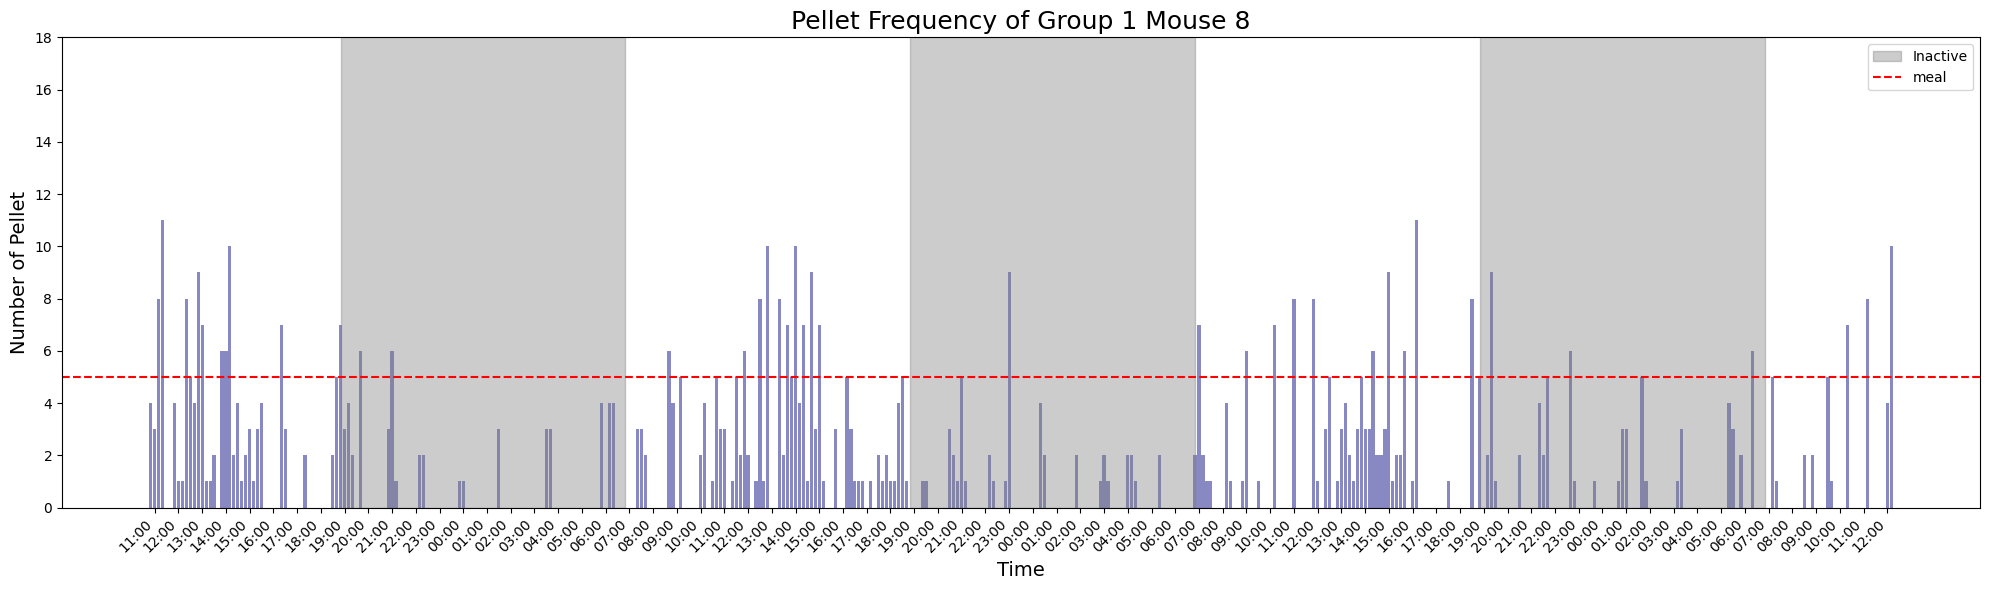

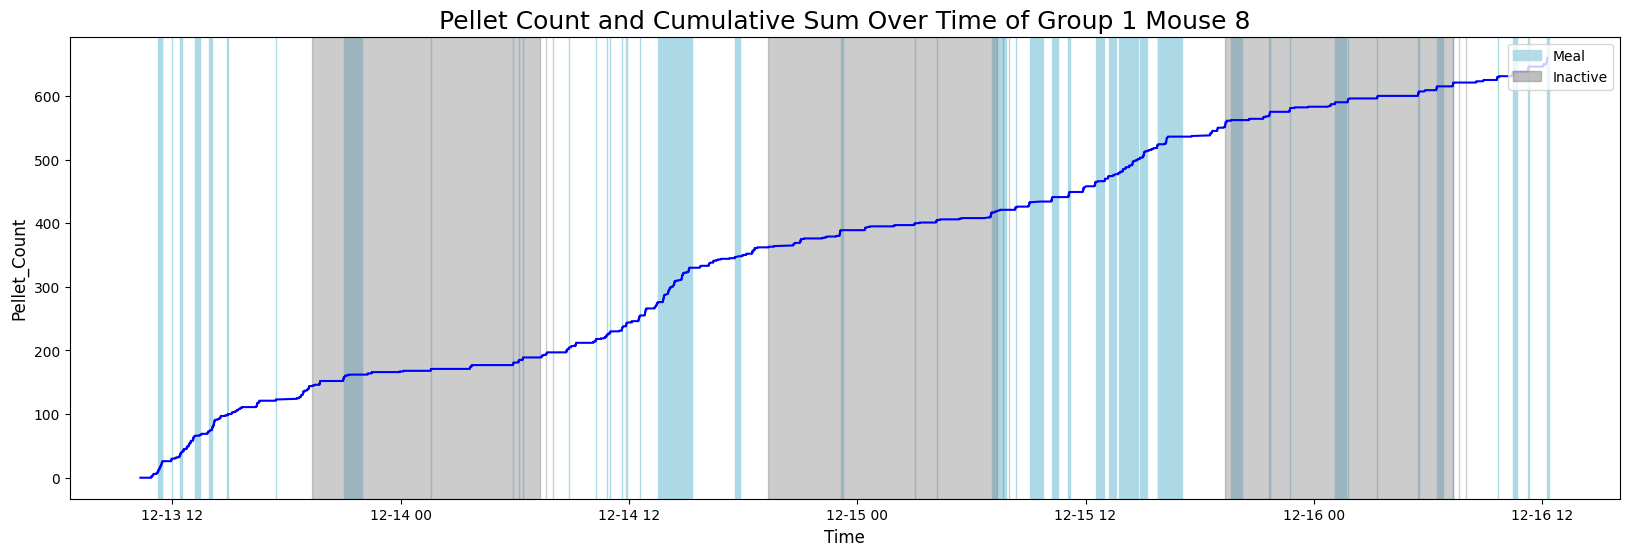

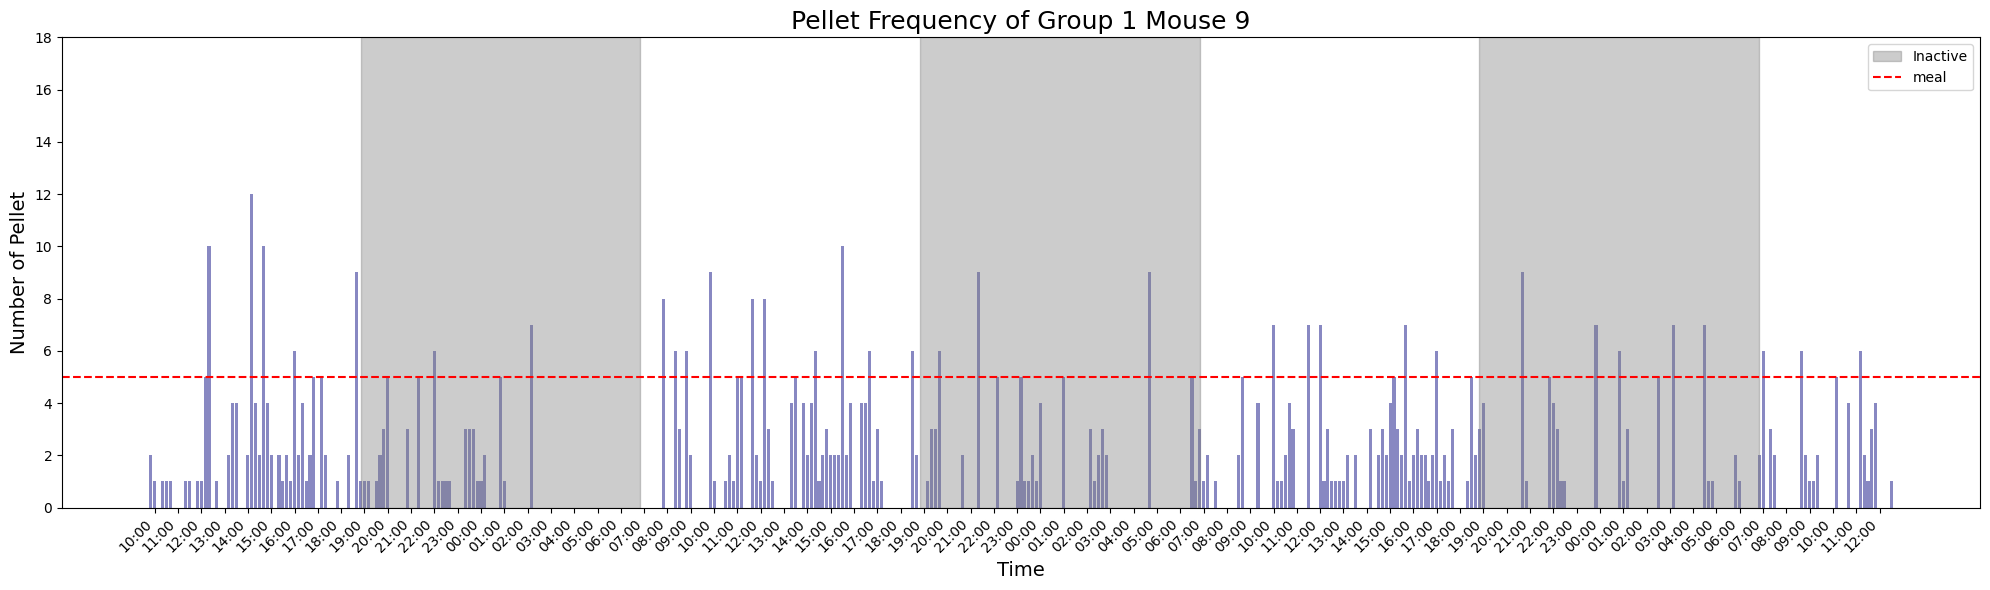

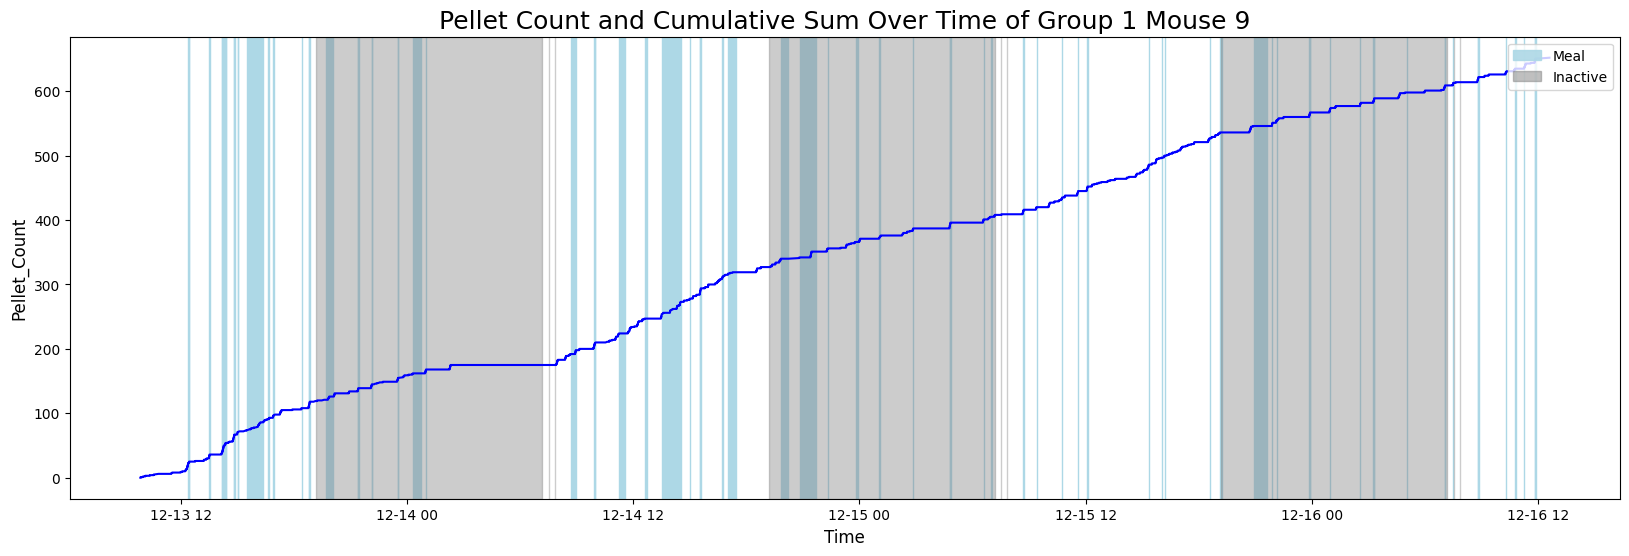

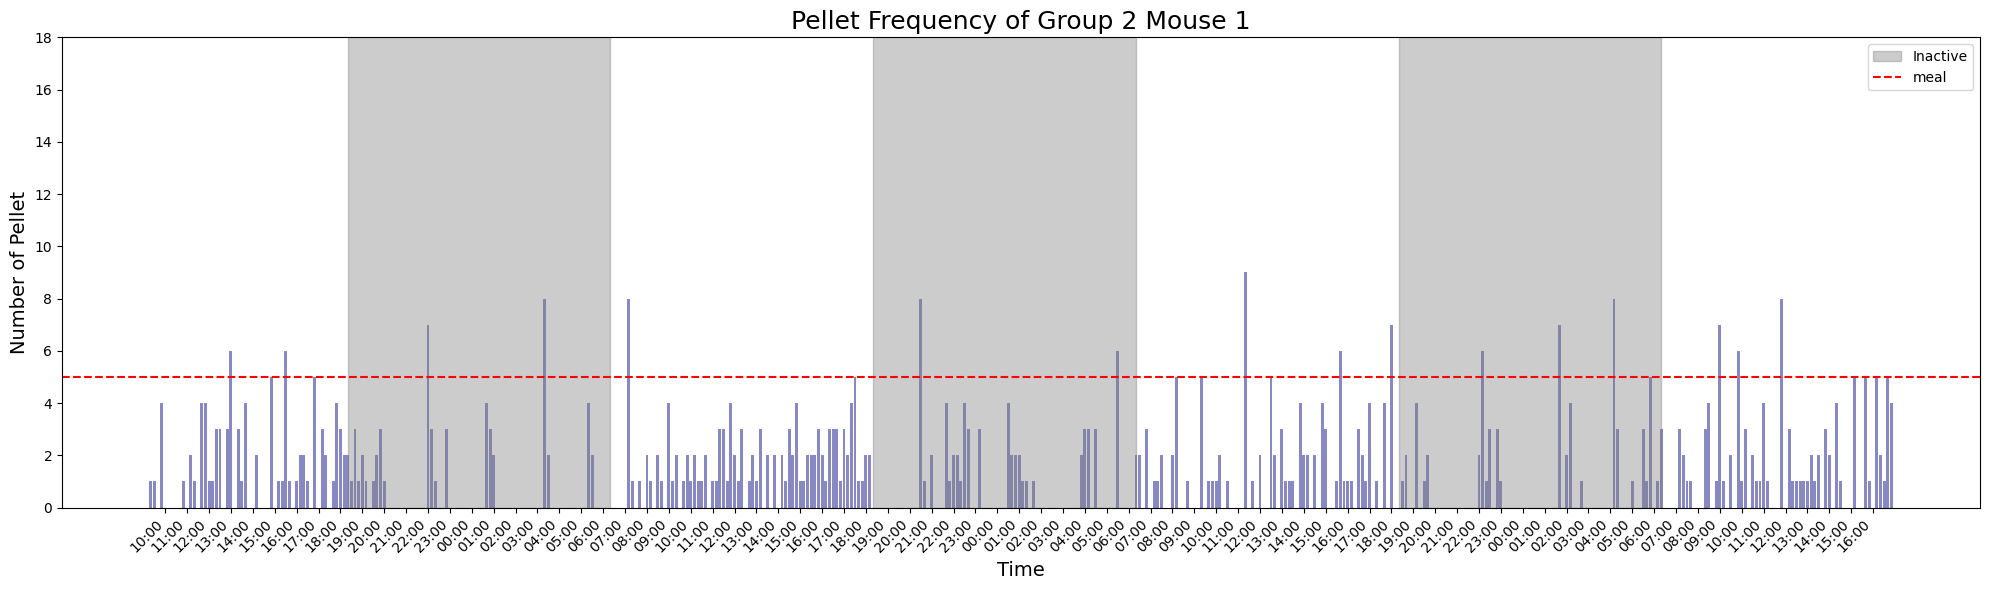

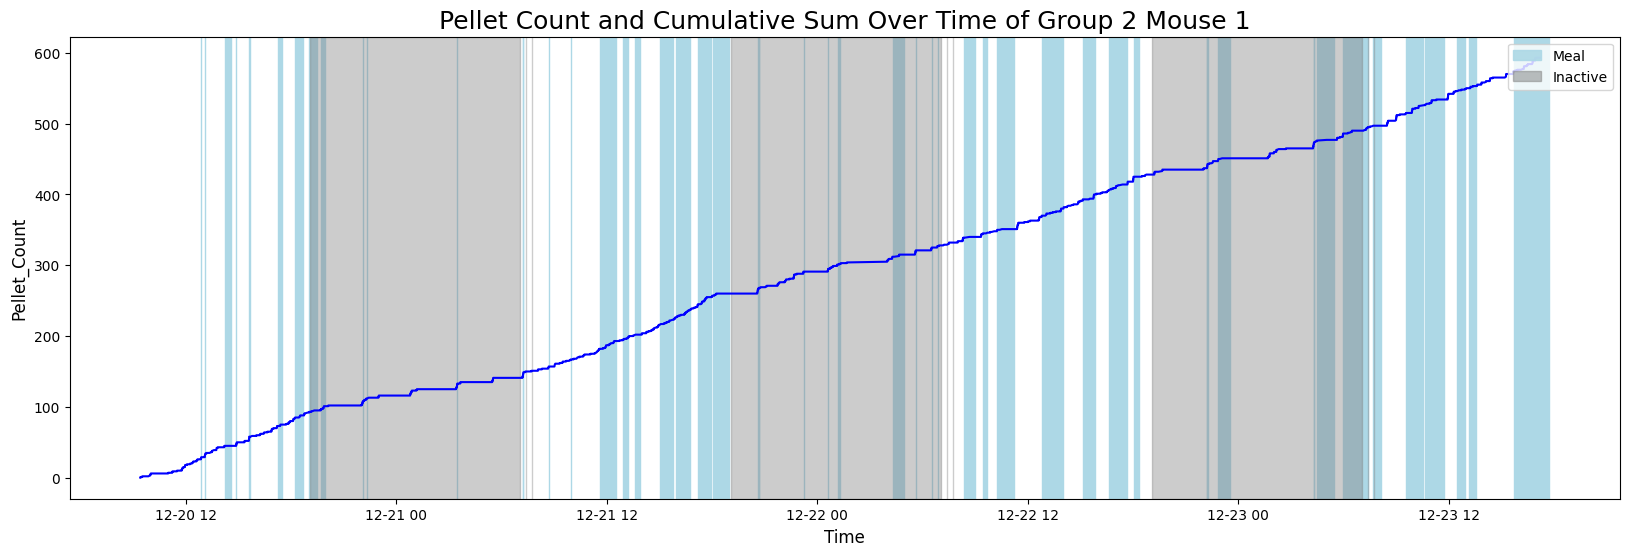

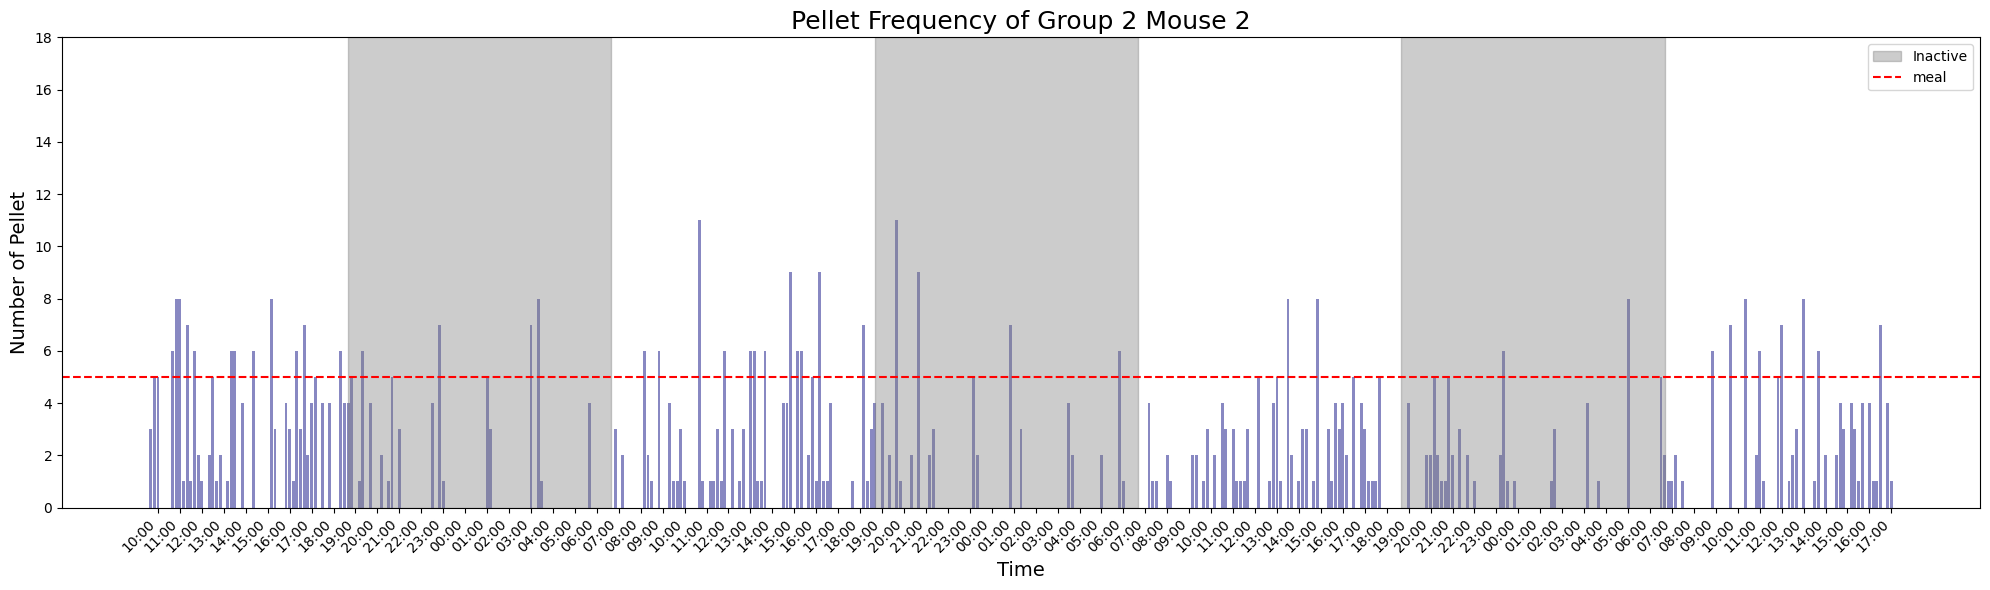

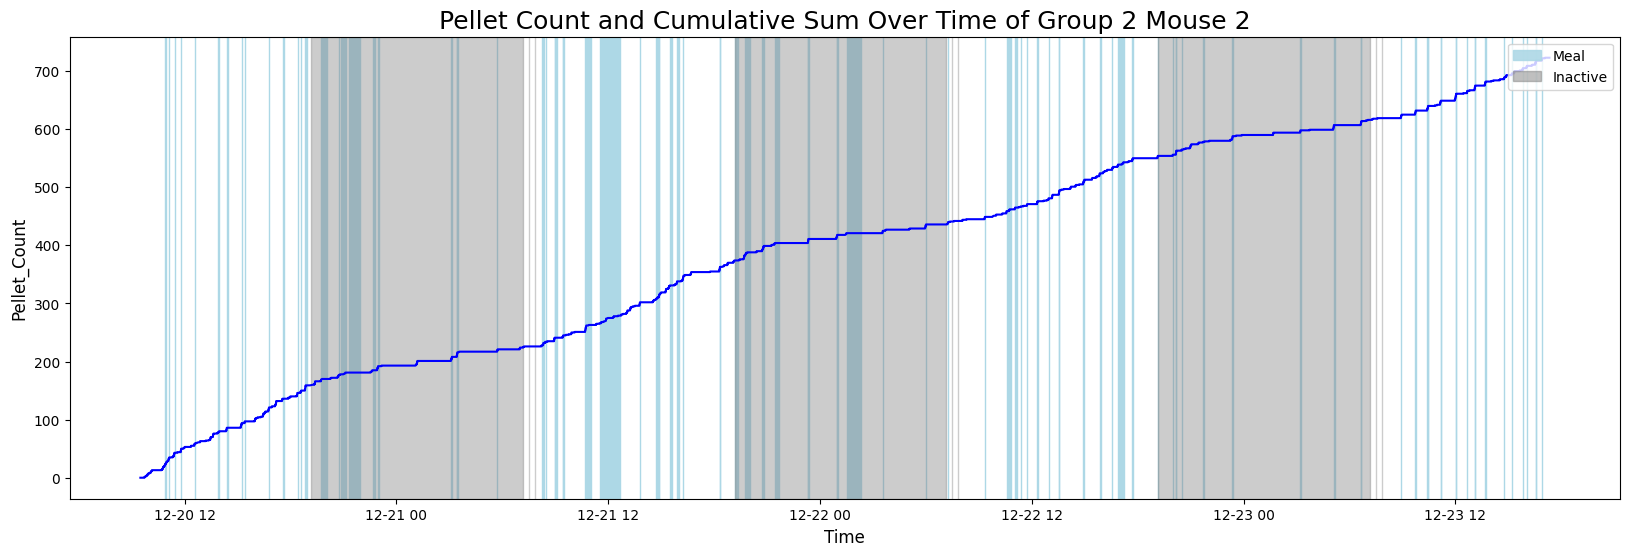

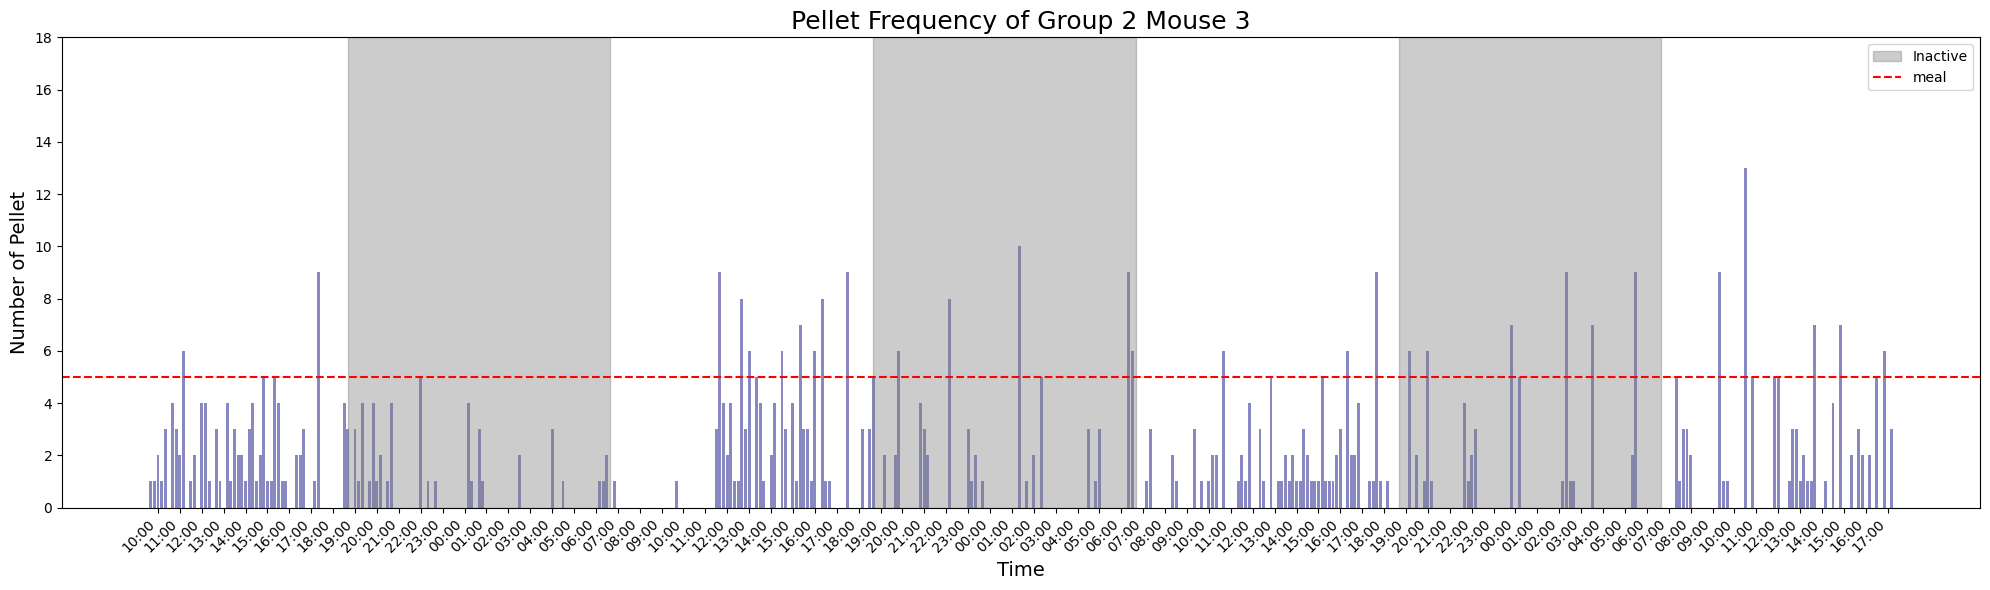

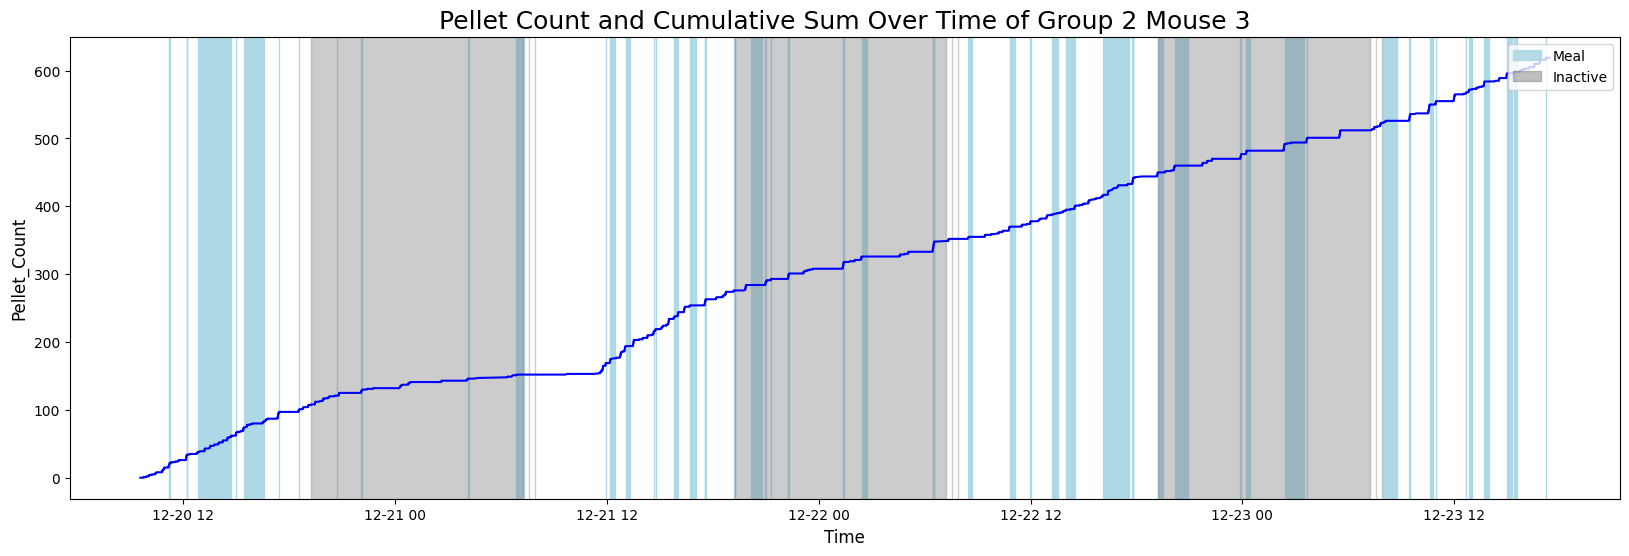

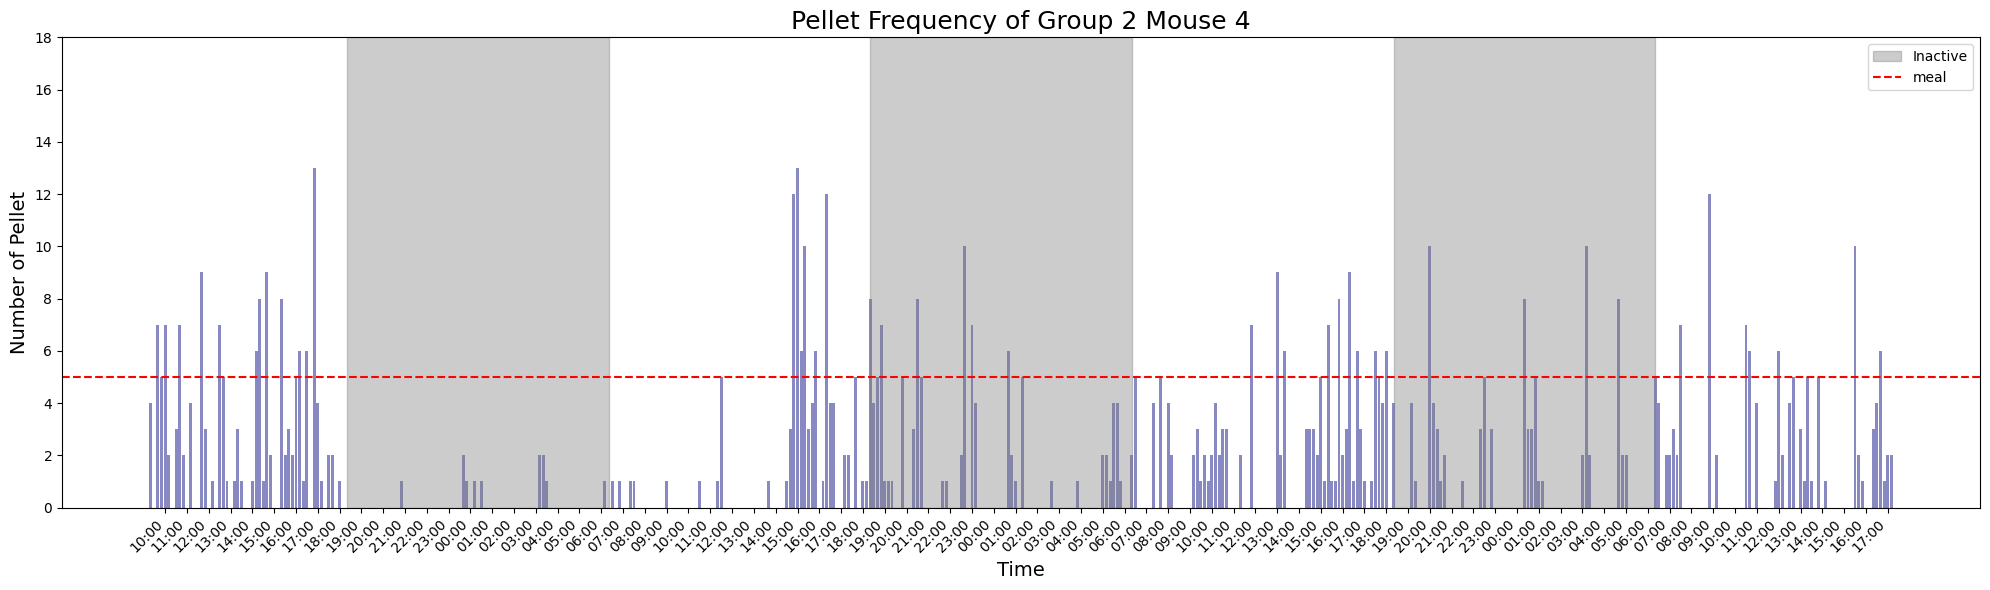

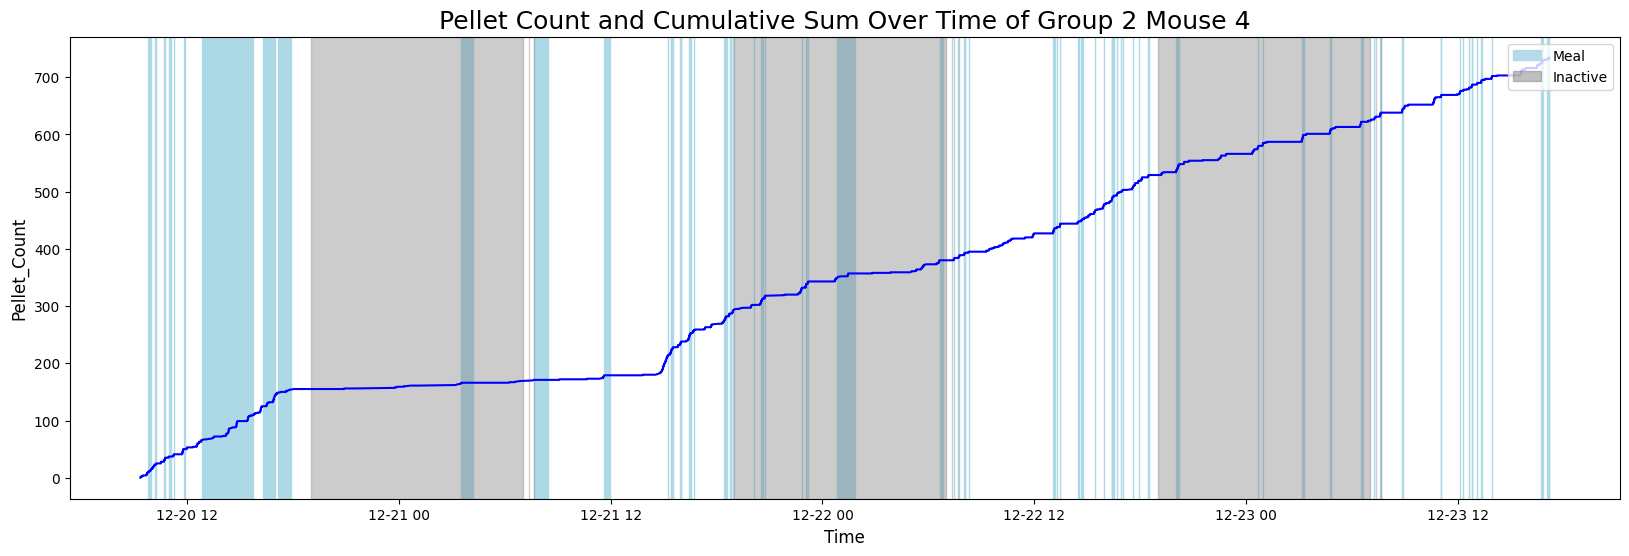

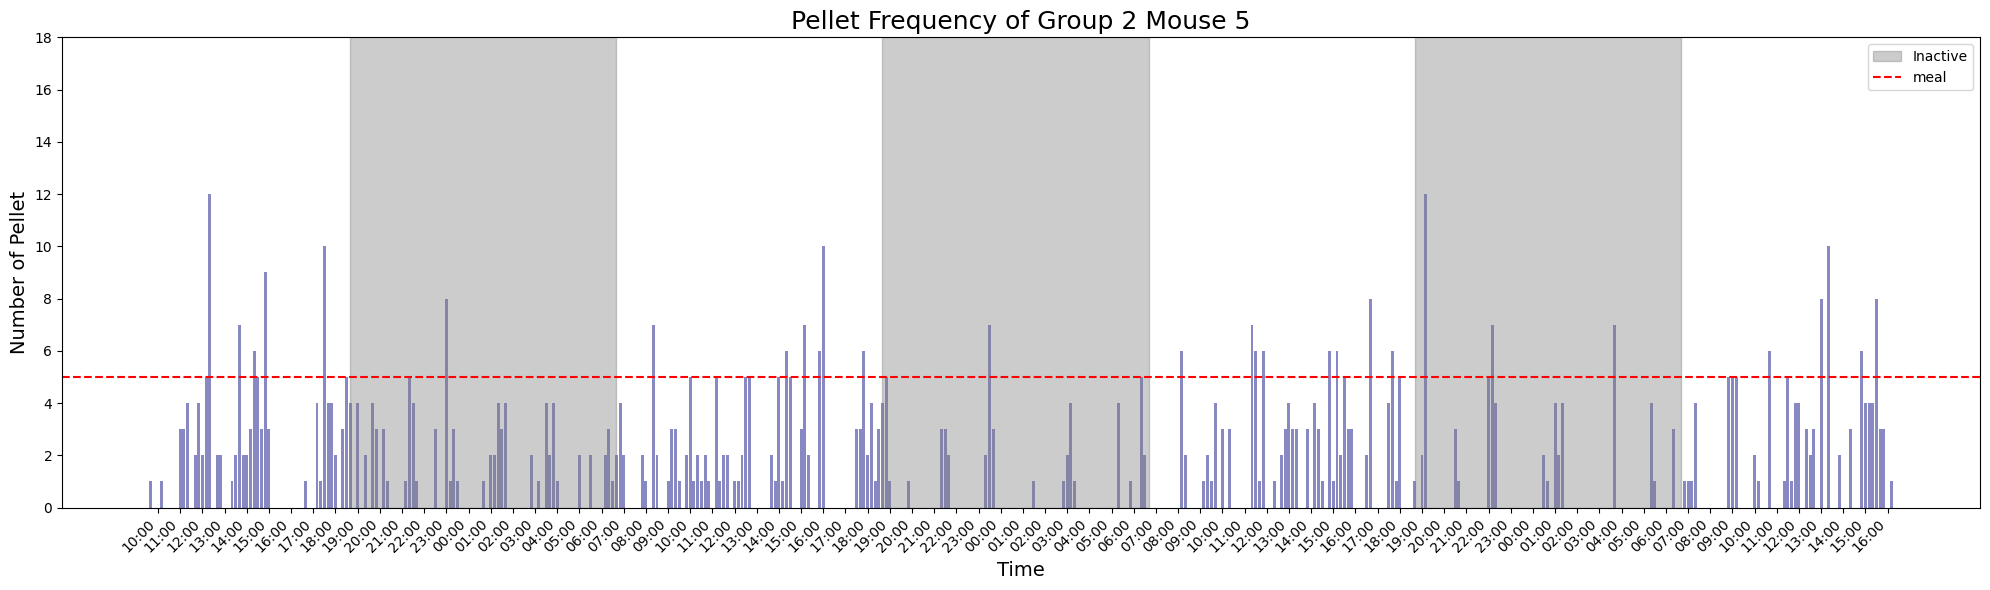

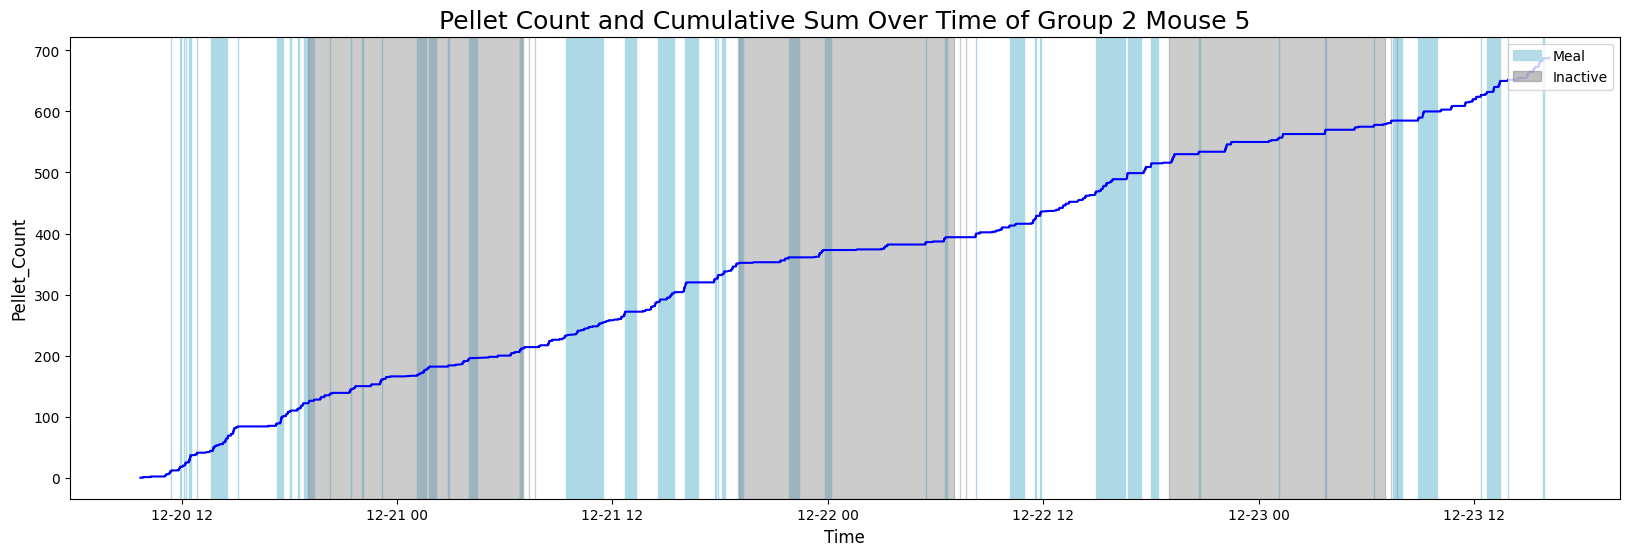

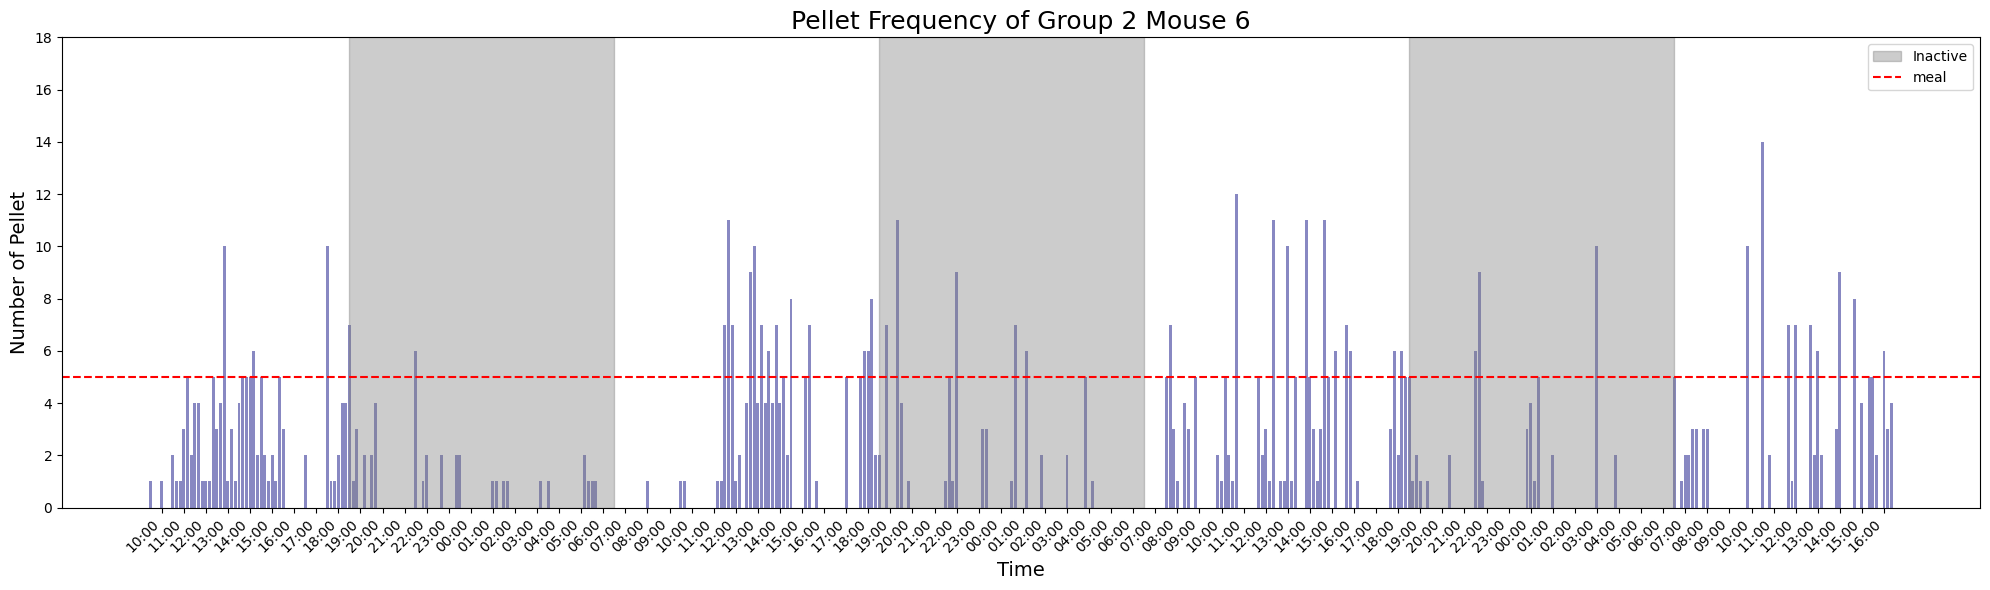

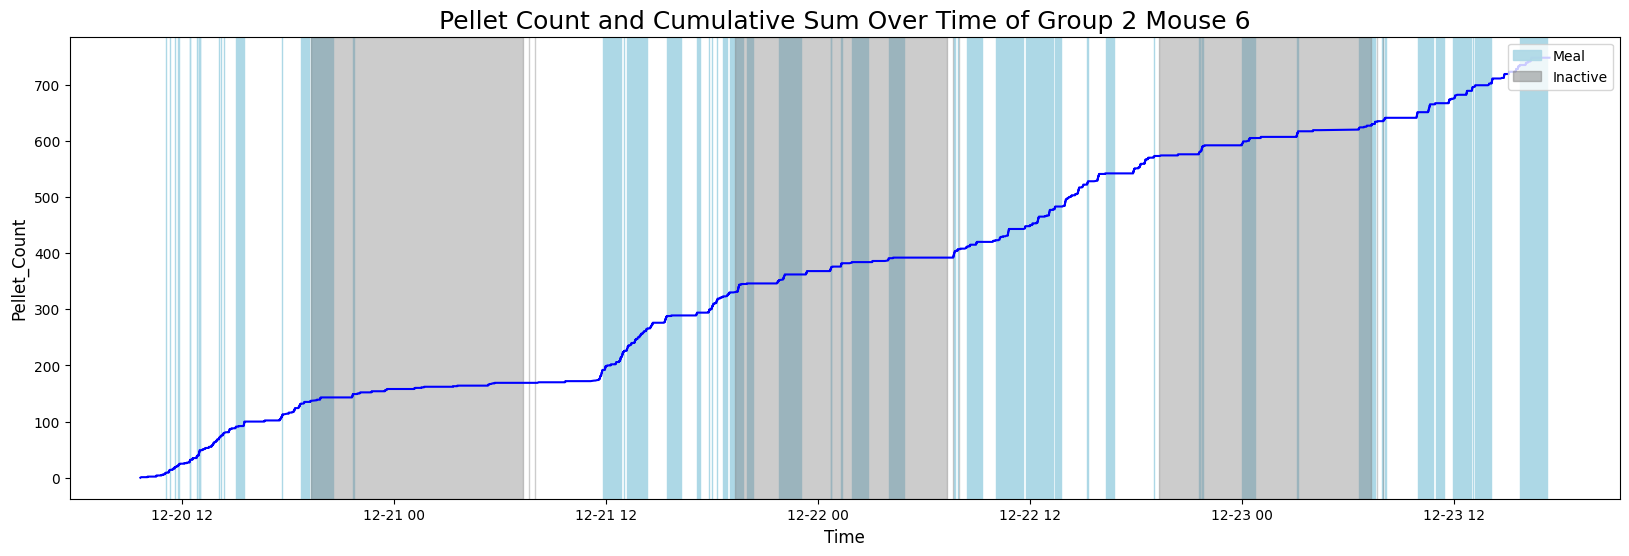

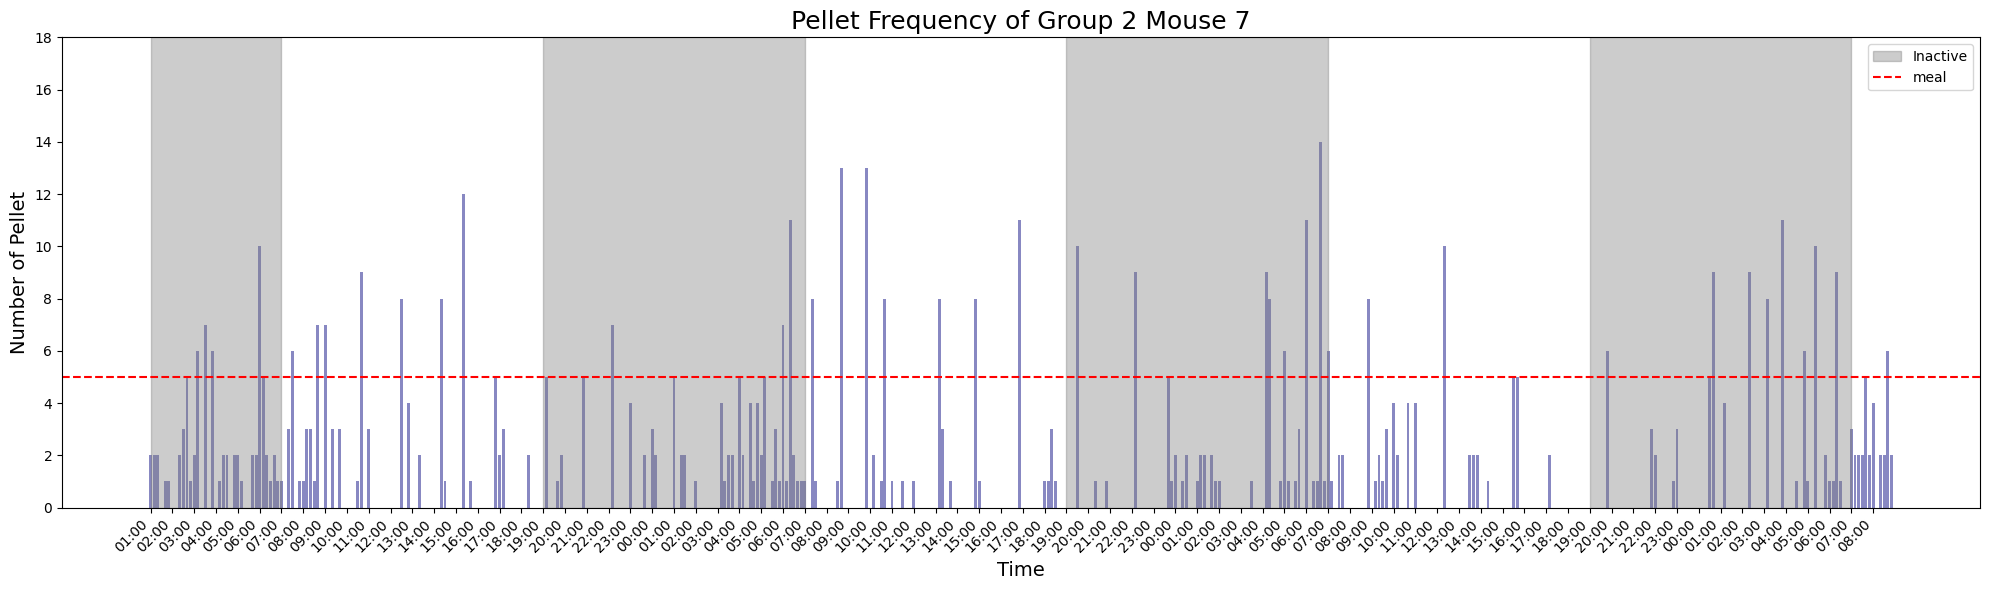

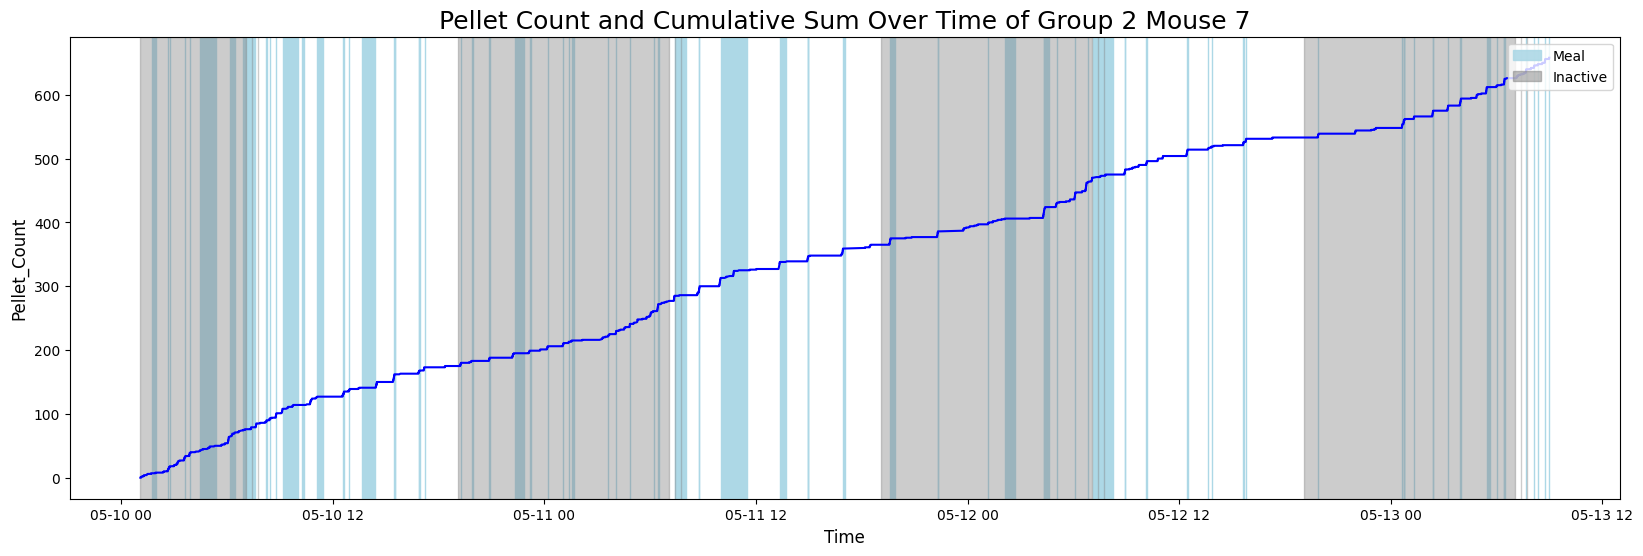

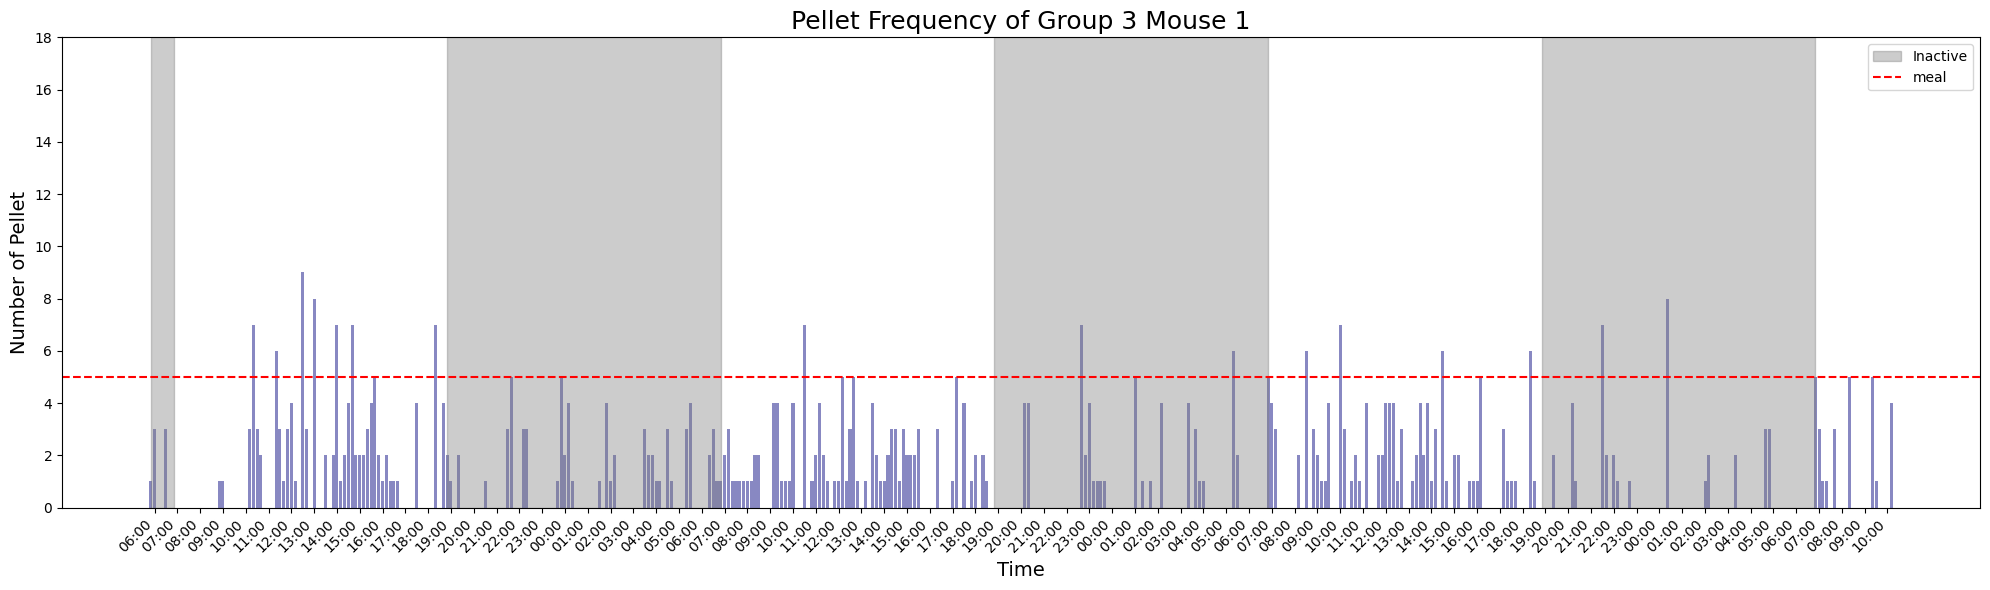

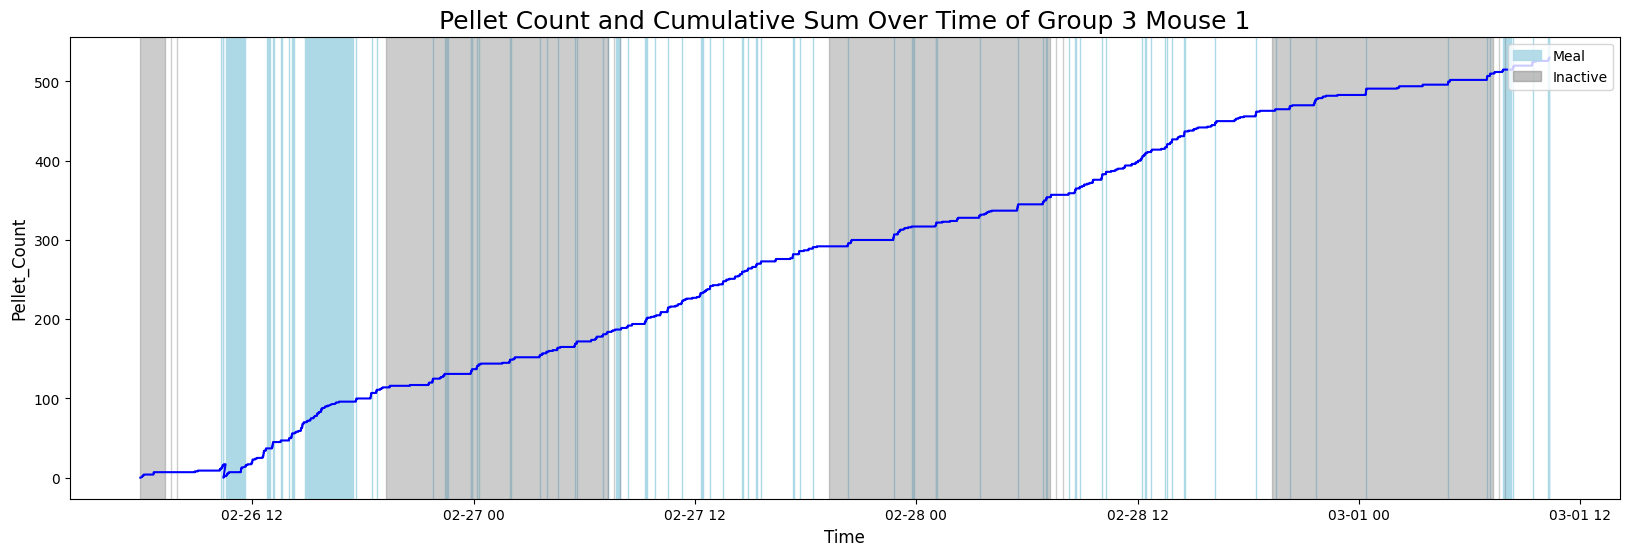

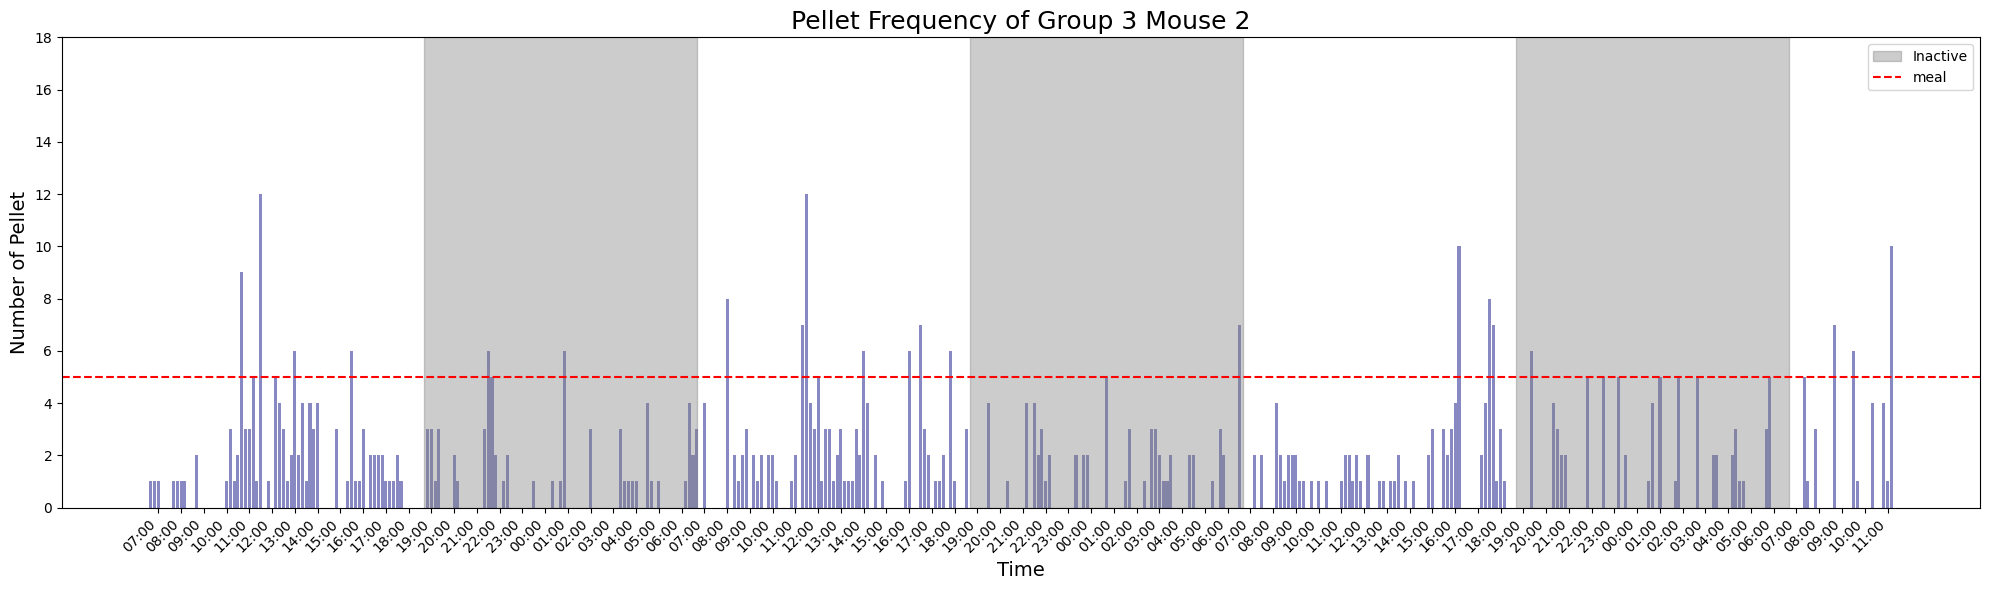

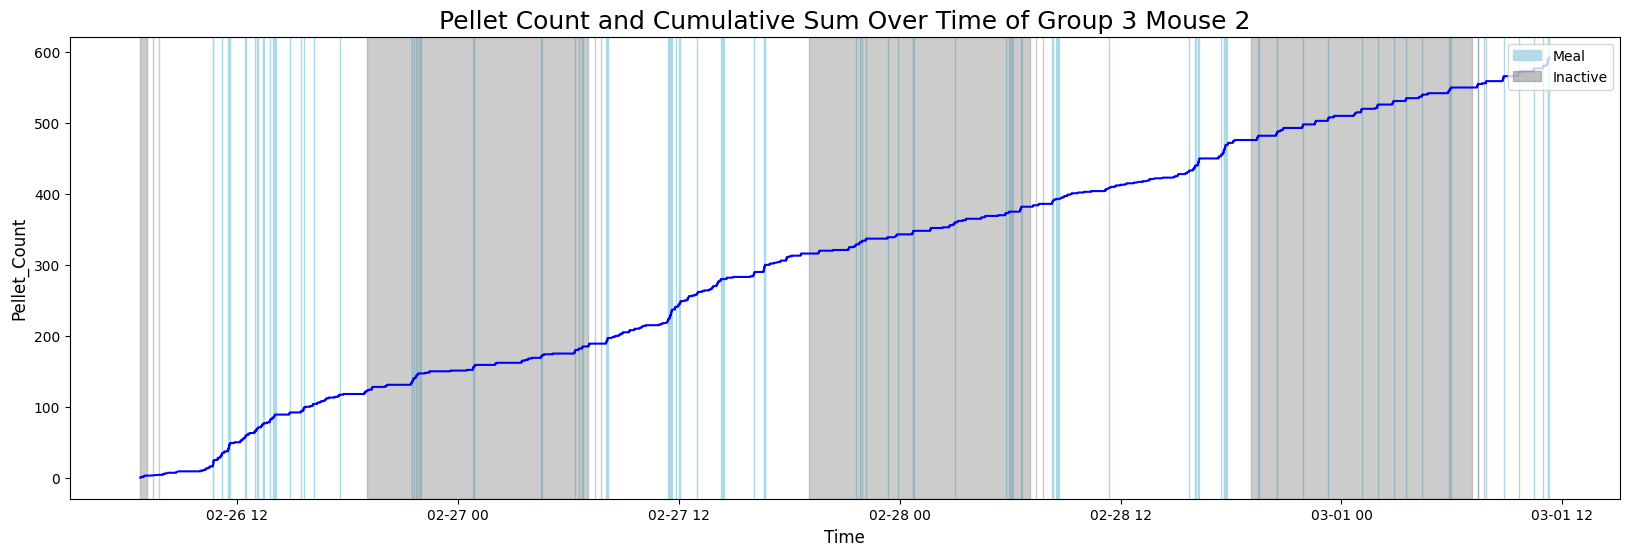

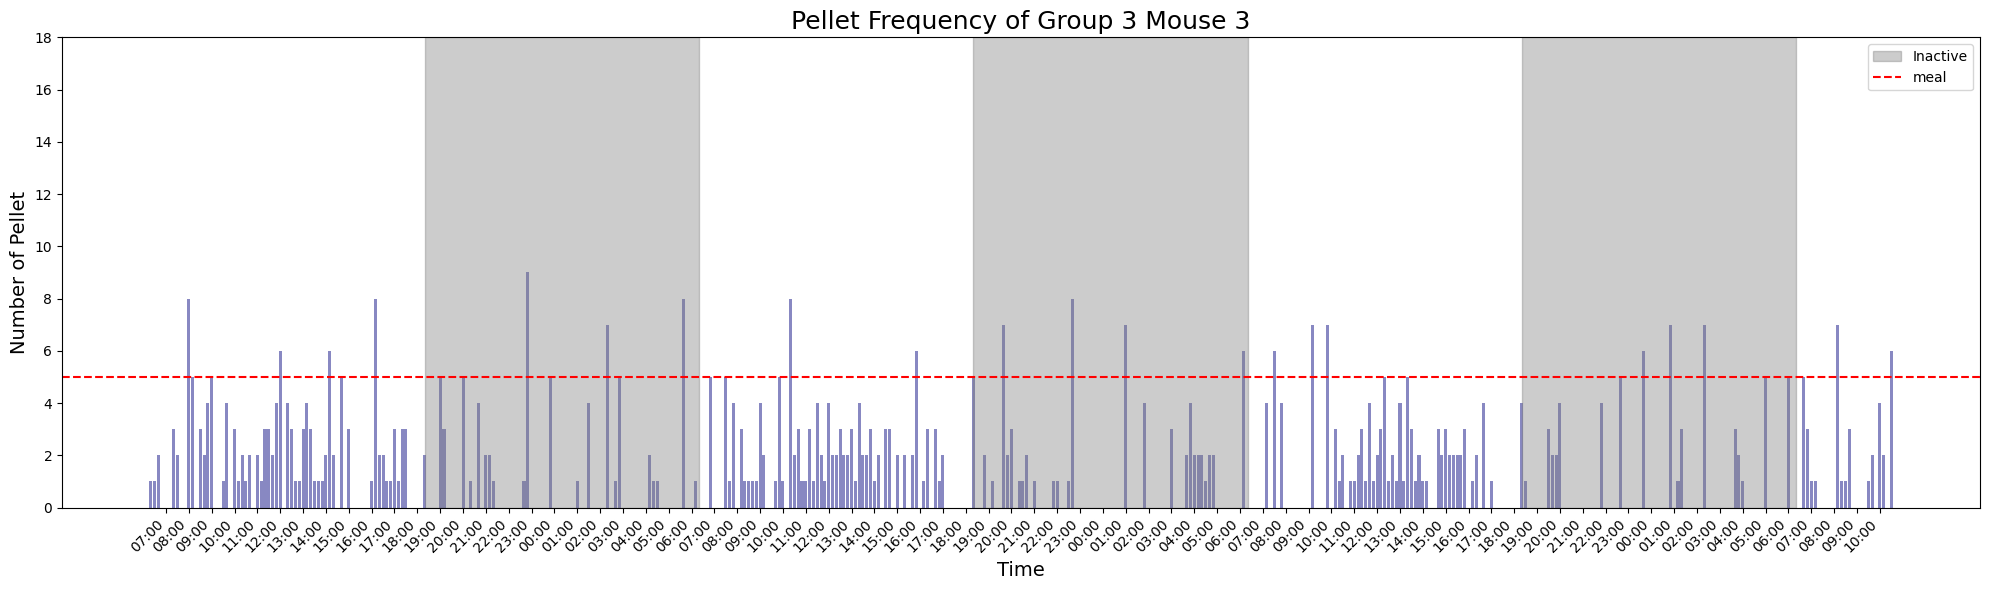

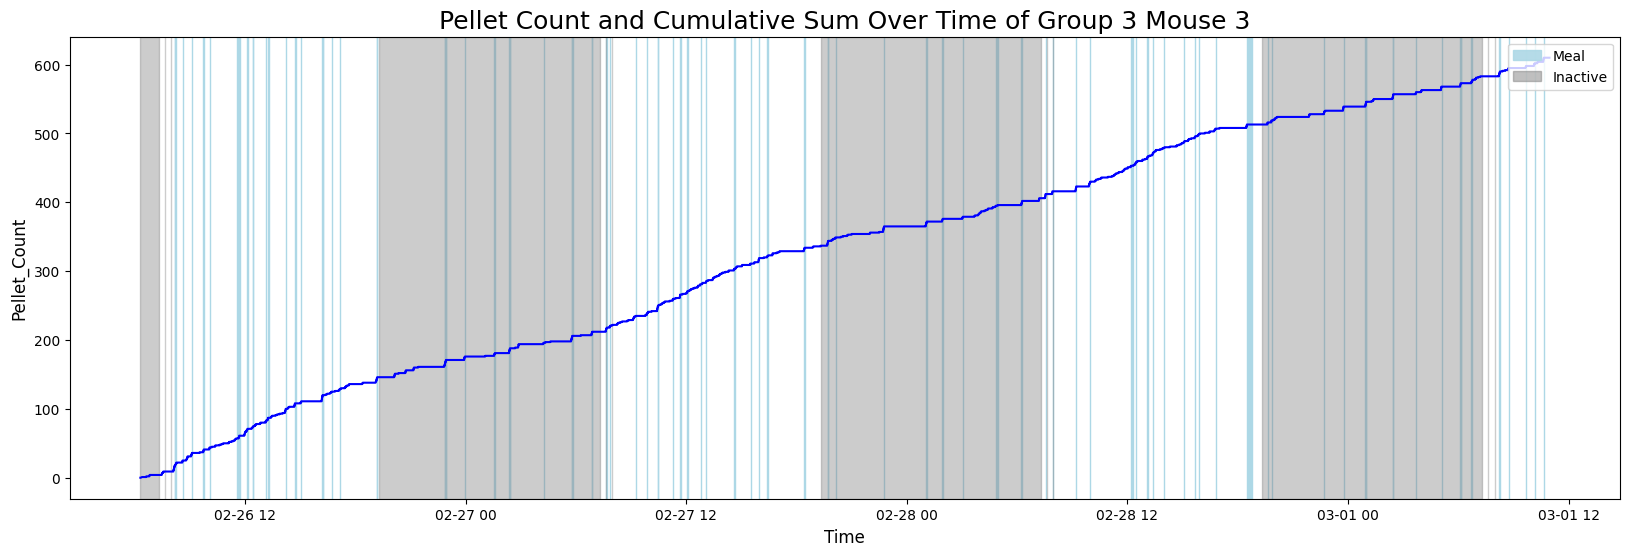

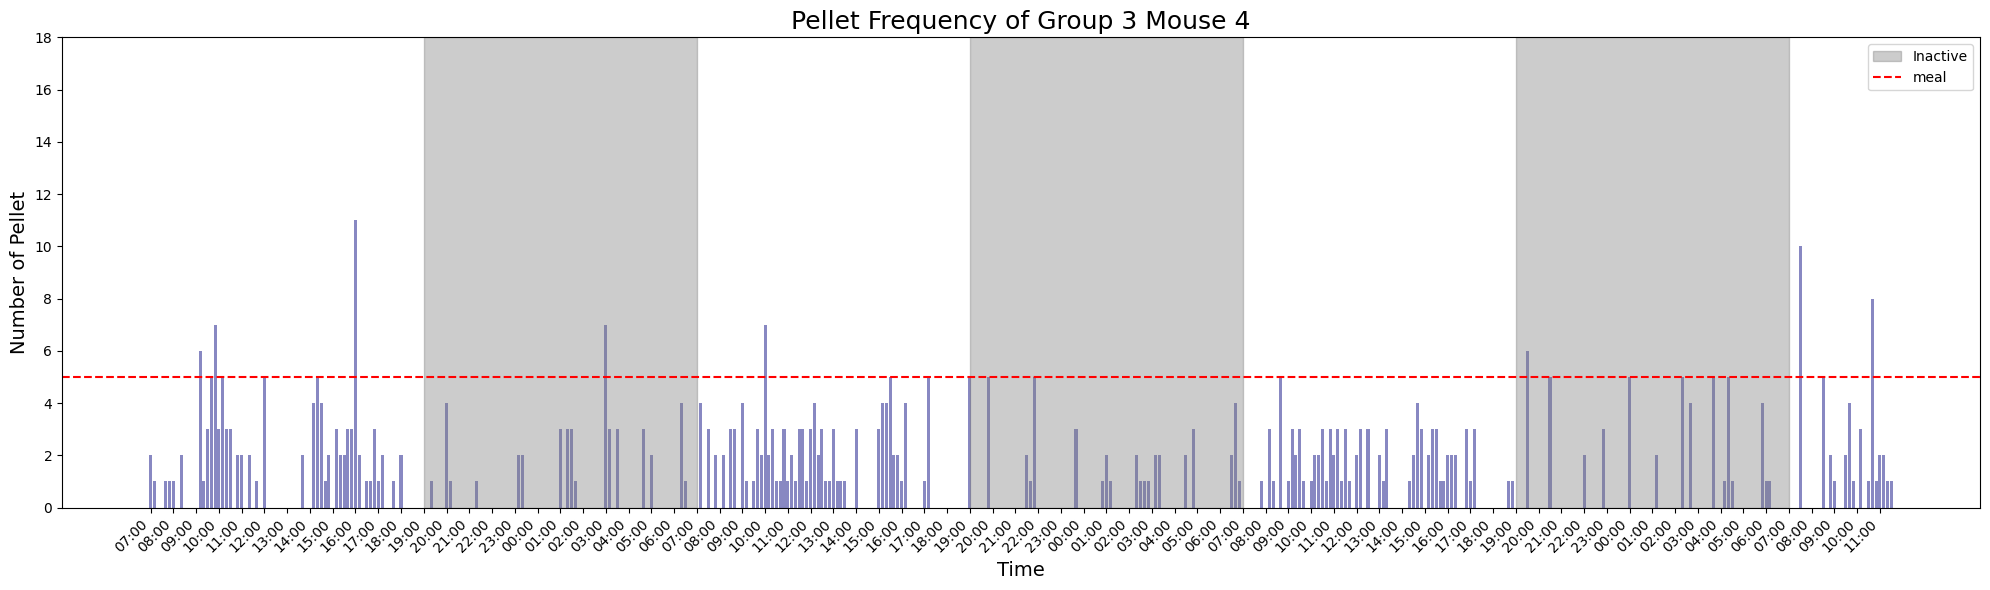

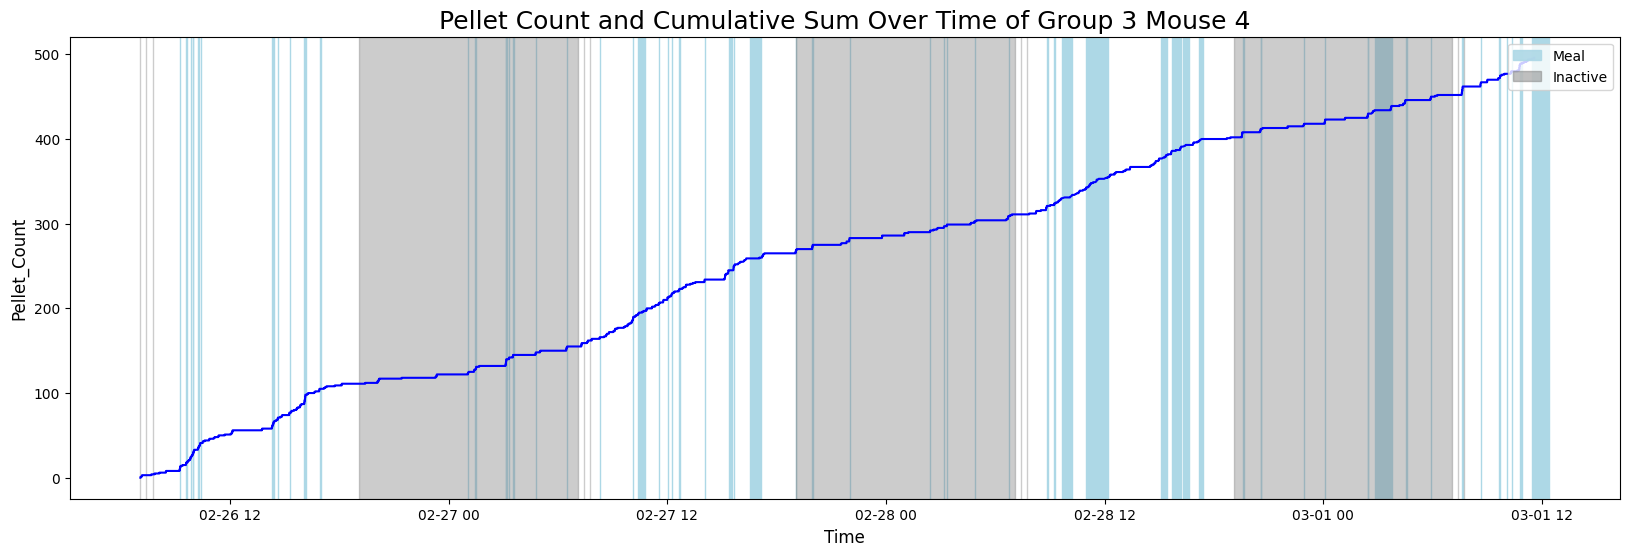

In [2]:
female_avg_pellet = [] # pellet per hour
female_dark_meals = [] # percentage of meals in inactive/dark phase
female_fir_meal = []
flip_female_meal_count = []
female_fir_good_meal = []

for sheet in rev_female_sheets:
    data = read_excel_by_sheet(sheet, rev_female_path, cumulative_accuracy=False)
    meal, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    flip_female_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    female_avg_pellet.append(ml.average_pellet(group))
    female_dark_meals.append(ml.active_meal(meal))
    female_fir_meal.append(meal_1)
    female_fir_good_meal.append(meal_1_good)
    sheet = sheet.replace('.', '') + '.svg'
    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, 'WT_meal', f'pellet_freq_{sheet}'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, 'WT_meal', f'pellet_curve_{sheet}'))

In [3]:
import numpy as np
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

### Meal Analysis

### Average Pellet

Female Size: 20
Female Average: 195.416
Female SE: 9.038


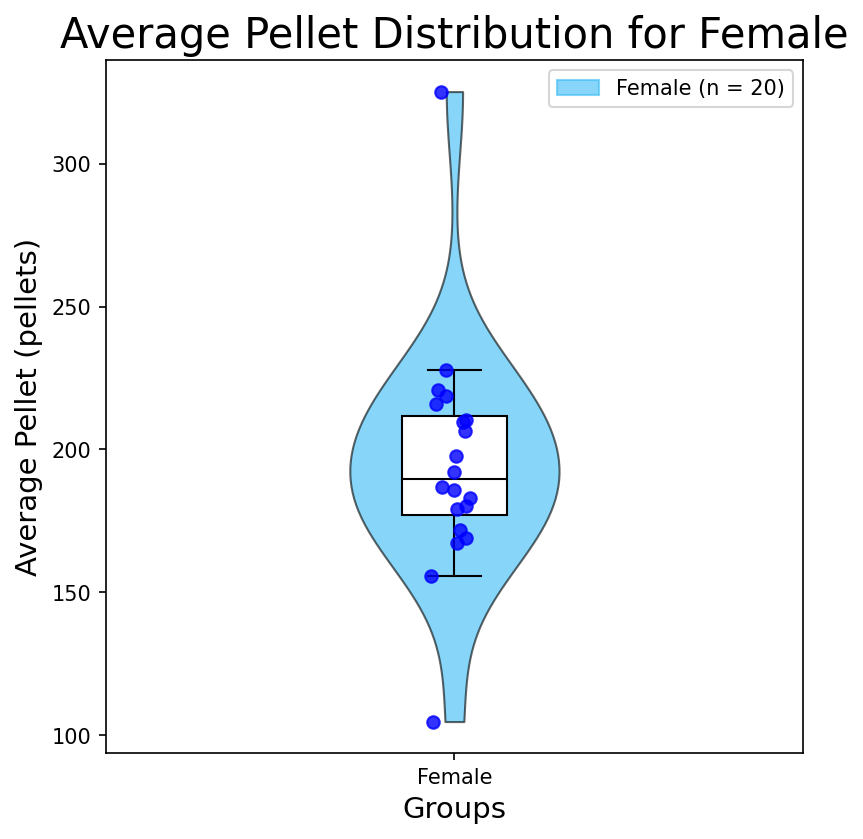

In [4]:
from accuracy import graph_single_stats
graph_single_stats(female_avg_pellet, stats_name='Average Pellet', unit='pellets', violin_width=0.3,
                  group_name='Female', export_path=os.path.join(export_root, 'wt_rev_pellet_by_day.svg'))